In [1]:
%load_ext rpy2.ipython

In [2]:
pip install rpy2

In [3]:
%%R
install.packages(c("factoextra","NbClust"))
install.packages("factoextra",dep="TRUE")

(as ‘lib’ is unspecified)
































































































































































































































	‘/tmp/RtmpanNQhI/downloaded_packages’

(as ‘lib’ is unspecified)

  subscript out of bounds




Error in available[p1, dependencies, drop = FALSE] : 
  subscript out of bounds


In [4]:
%%R
library(ggplot2)
library(factoextra)
library(NbClust)
library(cluster)
library(readxl)

CLUSTERING

1. KALIMANTAN BARAT

In [6]:
#A. Input Data
%%R
library(readxl)
datab <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kalbar 2022")

In [7]:
%%R
datab = as.data.frame(datab)
datab

    Kabupaten/Kota   AHH   HLS   RLS   PPK
1       Bengkayang 74.00 12.14  7.00  9484
2      Kapuas Hulu 72.69 12.14  7.59  7668
3     Kayong Utara 68.82 11.95  6.21  8234
4         Ketapang 71.27 11.95  7.48  9426
5   Kota Pontianak 73.46 15.02 10.44 15141
6  Kota Singkawang 72.46 12.92  8.19 12089
7        Kubu Raya 70.95 13.88  7.02  9142
8           Landak 73.39 12.44  7.15  7969
9           Melawi 73.14 11.18  7.18  8830
10        Mempawah 71.47 12.87  7.17  8049
11          Sambas 69.39 12.70  6.74 10462
12         Sanggau 71.58 11.65  7.41  8782
13         Sekadau 72.39 11.90  7.12  7566
14         Sintang 72.12 12.29  7.36  8858


In [8]:
%%R
summary(datab)

 Kabupaten/Kota          AHH             HLS             RLS        
 Length:14          Min.   :68.82   Min.   :11.18   Min.   : 6.210  
 Class :character   1st Qu.:71.32   1st Qu.:11.95   1st Qu.: 7.045  
 Mode  :character   Median :72.25   Median :12.21   Median : 7.175  
                    Mean   :71.94   Mean   :12.50   Mean   : 7.433  
                    3rd Qu.:73.03   3rd Qu.:12.83   3rd Qu.: 7.463  
                    Max.   :74.00   Max.   :15.02   Max.   :10.440  
      PPK       
 Min.   : 7566  
 1st Qu.: 8095  
 Median : 8844  
 Mean   : 9407  
 3rd Qu.: 9470  
 Max.   :15141  


In [235]:
%%R
str(datab)
#Mengubah kolom Kabupaten/Kota menjadi nama baris
rownames(datab) = datab$'Kabupaten/Kota'
datab

'data.frame':	14 obs. of  5 variables:
 $ Kabupaten/Kota: chr  "Bengkayang" "Kapuas Hulu" "Kayong Utara" "Ketapang" ...
 $ AHH           : num  74 72.7 68.8 71.3 73.5 ...
 $ HLS           : num  12.1 12.1 11.9 11.9 15 ...
 $ RLS           : num  7 7.59 6.21 7.48 10.44 ...
 $ PPK           : num  9484 7668 8234 9426 15141 ...
                 Kabupaten/Kota   AHH   HLS   RLS   PPK
Bengkayang           Bengkayang 74.00 12.14  7.00  9484
Kapuas Hulu         Kapuas Hulu 72.69 12.14  7.59  7668
Kayong Utara       Kayong Utara 68.82 11.95  6.21  8234
Ketapang               Ketapang 71.27 11.95  7.48  9426
Kota Pontianak   Kota Pontianak 73.46 15.02 10.44 15141
Kota Singkawang Kota Singkawang 72.46 12.92  8.19 12089
Kubu Raya             Kubu Raya 70.95 13.88  7.02  9142
Landak                   Landak 73.39 12.44  7.15  7969
Melawi                   Melawi 73.14 11.18  7.18  8830
Mempawah               Mempawah 71.47 12.87  7.17  8049
Sambas                   Sambas 69.39 12.70  6.74 10462
S

In [237]:
%%R
databb = datab[,2:5]
databb

                  AHH   HLS   RLS   PPK
Bengkayang      74.00 12.14  7.00  9484
Kapuas Hulu     72.69 12.14  7.59  7668
Kayong Utara    68.82 11.95  6.21  8234
Ketapang        71.27 11.95  7.48  9426
Kota Pontianak  73.46 15.02 10.44 15141
Kota Singkawang 72.46 12.92  8.19 12089
Kubu Raya       70.95 13.88  7.02  9142
Landak          73.39 12.44  7.15  7969
Melawi          73.14 11.18  7.18  8830
Mempawah        71.47 12.87  7.17  8049
Sambas          69.39 12.70  6.74 10462
Sanggau         71.58 11.65  7.41  8782
Sekadau         72.39 11.90  7.12  7566
Sintang         72.12 12.29  7.36  8858


In [238]:
%%R
#C. Standardize the data
datab_scaled <- scale(databb)

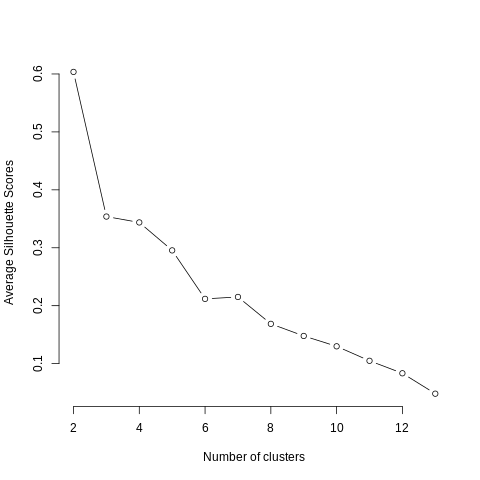

In [239]:
#D. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(datab_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(datab_scaled))
  mean(ss[, 3])
}
k <- 2:13
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [240]:
#E. K-Means Clustering dengan k=2
%%R
set.seed(26)
kb_2<-kmeans(datab_scaled, centers = 2, nstart = 25)
str(kb_2)
kb_2

List of 9
 $ cluster     : Named int [1:14] 1 1 1 1 2 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:14] "Bengkayang" "Kapuas Hulu" "Kayong Utara" "Ketapang" ...
 $ centers     : num [1:2, 1:4] -0.0782 1.016 -0.1988 2.5838 -0.2379 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 52
 $ withinss    : num [1:2] 24.9 0
 $ tot.withinss: num 24.9
 $ betweenss   : num 27.1
 $ size        : int [1:2] 13 1
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 13, 1

Cluster means:
          AHH        HLS        RLS        PPK
1 -0.07815133 -0.1987544 -0.2378767 -0.2164351
2  1.01596727  2.5838072  3.0923973  2.8136565

Clustering vector:
     Bengkayang     Kapuas Hulu    Kayong Utara        Ketapang  Kota Pontianak 
              1               1               1               1               2 
Kota Singkawang       Kubu Raya          Landa

In [241]:
%%R
data_kb2 = as.data.frame(kb_2$cluster)
data_kb2
colnames(data_kb2)[1] = "Cluster"
data_kb2

                Cluster
Bengkayang            1
Kapuas Hulu           1
Kayong Utara          1
Ketapang              1
Kota Pontianak        2
Kota Singkawang       1
Kubu Raya             1
Landak                1
Melawi                1
Mempawah              1
Sambas                1
Sanggau               1
Sekadau               1
Sintang               1


In [242]:
%%R
write.csv(data_kb2, file='/content/Data 2 Cluster Kalimantan Barat')

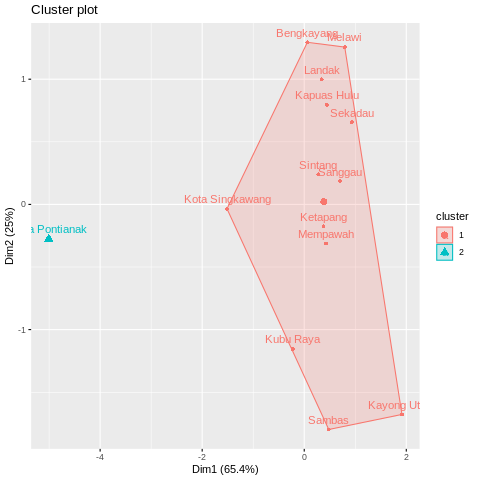

In [243]:
#F. PLOT
%%R
fviz_cluster(kb_2, data = datab_scaled)


In [329]:
#G. K-Means Clustering dengan k=3
%%R
set.seed(88)
kb_3<-kmeans(datab_scaled, centers = 3, nstart = 25)
str(kb_3)
kb_3

List of 9
 $ cluster     : Named int [1:14] 2 2 1 2 3 2 1 2 2 2 ...
  ..- attr(*, "names")= chr [1:14] "Bengkayang" "Kapuas Hulu" "Kayong Utara" "Ketapang" ...
 $ centers     : num [1:3, 1:4] -1.48 0.343 1.016 0.35 -0.363 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 52
 $ withinss    : num [1:3] 4.04 10.68 0
 $ tot.withinss: num 14.7
 $ betweenss   : num 37.3
 $ size        : int [1:3] 3 10 1
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 3 clusters of sizes 3, 10, 1

Cluster means:
         AHH        HLS         RLS         PPK
1 -1.4803277  0.3501273 -0.79819597 -0.06271731
2  0.3425016 -0.3634189 -0.06978094 -0.26255046
3  1.0159673  2.5838072  3.09239727  2.81365650

Clustering vector:
     Bengkayang     Kapuas Hulu    Kayong Utara        Ketapang  Kota Pontianak 
              2               2               1               2     

In [330]:
%%R
data_kb3 = as.data.frame(kb_3$cluster)
data_kb3
colnames(data_kb3)[1] = "Cluster"
data_kb3

                Cluster
Bengkayang            2
Kapuas Hulu           2
Kayong Utara          1
Ketapang              2
Kota Pontianak        3
Kota Singkawang       2
Kubu Raya             1
Landak                2
Melawi                2
Mempawah              2
Sambas                1
Sanggau               2
Sekadau               2
Sintang               2


In [331]:
%%R
write.csv(data_kb3, file='/content/Data 3 Cluster Kalimantan Barat')

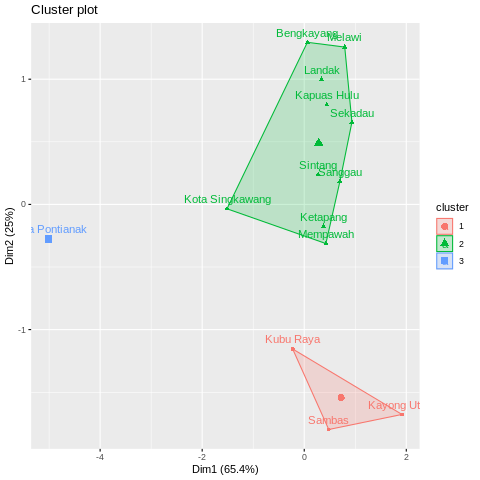

In [332]:
#H. PLOT
%%R
fviz_cluster(kb_3, data = datab_scaled)

2. KALIMANTAN TIMUR

In [39]:
#A. Input Data

%%R
datat <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kaltim 2022")
datat

# A tibble: 9 × 5
  `Kabupaten/Kota`      AHH   HLS   RLS   PPK
  <chr>               <dbl> <dbl> <dbl> <dbl>
1 Paser                72.9  13.3  8.8  11181
2 Kutai Barat          73.1  13.1  8.78 10740
3 Kutai Kartanegara    72.6  13.6  9.24 11677
4 Kutai Timur          73.5  13    9.44 11322
5 Berau                72.3  13.4  9.54 13095
6 Penajam Paser Utara  71.7  12.7  8.51 11890
7 Balikpapan           74.8  14.2 10.9  15455
8 Samarinda            74.6  15.1 10.7  15162
9 Bontang              74.6  13.2 10.8  17327


In [40]:
#B. Statistika Deskriptif
%%R
summary(datat)

 Kabupaten/Kota          AHH             HLS             RLS        
 Length:9           Min.   :71.71   Min.   :12.70   Min.   : 8.510  
 Class :character   1st Qu.:72.65   1st Qu.:13.09   1st Qu.: 8.800  
 Mode  :character   Median :73.10   Median :13.27   Median : 9.440  
                    Mean   :73.34   Mean   :13.51   Mean   : 9.639  
                    3rd Qu.:74.56   3rd Qu.:13.63   3rd Qu.:10.710  
                    Max.   :74.78   Max.   :15.10   Max.   :10.920  
      PPK       
 Min.   :10740  
 1st Qu.:11322  
 Median :11890  
 Mean   :13094  
 3rd Qu.:15162  
 Max.   :17327  


In [41]:
#Mengubah kolom Kabupaten/Kota menjadi nama baris
%%R
datat = as.data.frame(datat)
rownames(datat) = datat$'Kabupaten/Kota'
datatt = datat[,2:5]
datatt

                      AHH   HLS   RLS   PPK
Paser               72.89 13.27  8.80 11181
Kutai Barat         73.10 13.09  8.78 10740
Kutai Kartanegara   72.65 13.63  9.24 11677
Kutai Timur         73.47 13.00  9.44 11322
Berau               72.32 13.35  9.54 13095
Penajam Paser Utara 71.71 12.70  8.51 11890
Balikpapan          74.78 14.23 10.92 15455
Samarinda           74.56 15.10 10.71 15162
Bontang             74.57 13.18 10.81 17327


In [42]:
#C. Standardize the data
%%R
datat_scaled <- scale(datatt)

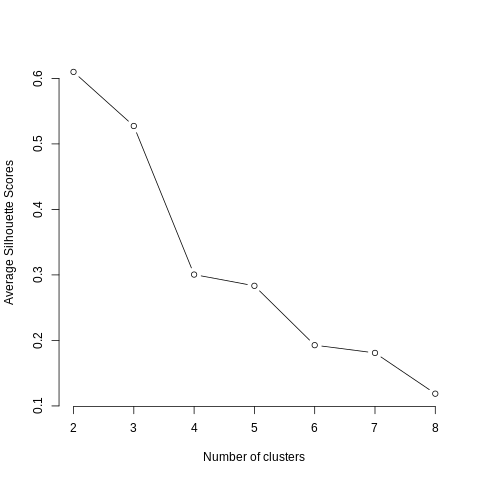

In [43]:
#D. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(datat_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(datat_scaled))
  mean(ss[, 3])
}
k <- 2:8
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [48]:
%%R
#E. K-Means Clustering dengan k=2
set.seed(37)
kt_2<-kmeans(datat_scaled, centers = 2, nstart = 25)
str(kt_2)
print(kt_2)

List of 9
 $ cluster     : Named int [1:9] 1 1 1 1 1 1 2 2 2
  ..- attr(*, "names")= chr [1:9] "Paser" "Kutai Barat" "Kutai Kartanegara" "Kutai Timur" ...
 $ centers     : num [1:2, 1:4] -0.595 1.189 -0.451 0.902 -0.624 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 32
 $ withinss    : num [1:2] 4.12 3.96
 $ tot.withinss: num 8.08
 $ betweenss   : num 23.9
 $ size        : int [1:2] 6 3
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 6, 3

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.5946703 -0.4507728 -0.6240212 -0.6185573
2  1.1893406  0.9015456  1.2480424  1.2371146

Clustering vector:
              Paser         Kutai Barat   Kutai Kartanegara         Kutai Timur 
                  1                   1                   1                   1 
              Berau Penajam Paser Utara          Balikpap

In [49]:
%%R
data_kt2 = as.data.frame(kt_2$cluster)
data_kt2
colnames(data_kt2)[1] = "Cluster"
data_kt2

                    Cluster
Paser                     1
Kutai Barat               1
Kutai Kartanegara         1
Kutai Timur               1
Berau                     1
Penajam Paser Utara       1
Balikpapan                2
Samarinda                 2
Bontang                   2


In [50]:
%%R
write.csv(data_kt2, file='/content/Data 2 Cluster Kalimantan Timur')

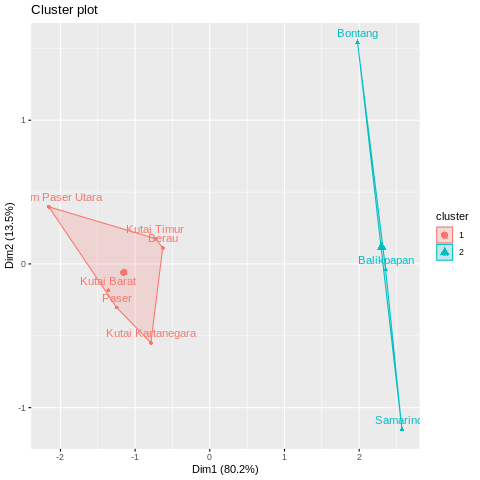

In [51]:
#F. Plot
%%R
fviz_cluster(kt_2, data = datat_scaled)


In [62]:
%%R
#G. K-Means Clustering dengan k=3
set.seed(99)
kt_3<-kmeans(datat_scaled, centers = 3, nstart = 25)
str(kt_3)
print(kt_3)

List of 9
 $ cluster     : Named int [1:9] 1 1 1 1 1 1 3 3 2
  ..- attr(*, "names")= chr [1:9] "Paser" "Kutai Barat" "Kutai Kartanegara" "Kutai Timur" ...
 $ centers     : num [1:3, 1:4] -0.595 1.128 1.22 -0.451 -0.442 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 32
 $ withinss    : num [1:3] 4.12 0 0.75
 $ tot.withinss: num 4.87
 $ betweenss   : num 27.1
 $ size        : int [1:3] 6 1 2
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 3 clusters of sizes 6, 1, 2

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.5946703 -0.4507728 -0.6240212 -0.6185573
2  1.1282443 -0.4417272  1.2445002  1.8137491
3  1.2198887  1.5731819  1.2498135  0.9487973

Clustering vector:
              Paser         Kutai Barat   Kutai Kartanegara         Kutai Timur 
                  1                   1                   1                   1 
 

In [63]:
%%R
data_kt3 = as.data.frame(kt_3$cluster)
data_kt3
colnames(data_kt3)[1] = "Cluster"
data_kt3

                    Cluster
Paser                     1
Kutai Barat               1
Kutai Kartanegara         1
Kutai Timur               1
Berau                     1
Penajam Paser Utara       1
Balikpapan                3
Samarinda                 3
Bontang                   2


In [64]:
%%R
write.csv(data_kt3, file='/content/Data 3 Cluster Kalimantan Timur')

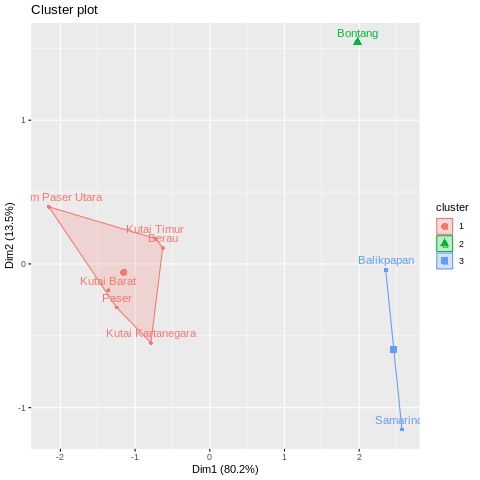

In [65]:
#H. Plot
%%R
fviz_cluster(kt_3, data = datat_scaled)

3. KALIMANTAN UTARA

In [66]:
#A. Input Data

%%R
library(readxl)
datau <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kalut 2022")
datau

# A tibble: 5 × 5
  `Kabupaten/Kota`   AHH   HLS   RLS   PPK
  <chr>            <dbl> <dbl> <dbl> <dbl>
1 Malinau           71.5  13.3  9.41 10304
2 Bulungan          72.8  13.0  9.2   9641
3 Tana Tidung       71.5  12.4  8.97  8012
4 Nunukan           71.4  12.7  8.24  7446
5 Tarakan           74.1  14.0 10.1  11596


In [67]:
#B. Statistika Deskriptif
%%R
summary(datau)

 Kabupaten/Kota          AHH             HLS             RLS       
 Length:5           Min.   :71.41   Min.   :12.38   Min.   : 8.24  
 Class :character   1st Qu.:71.50   1st Qu.:12.67   1st Qu.: 8.97  
 Mode  :character   Median :71.51   Median :13.03   Median : 9.20  
                    Mean   :72.25   Mean   :13.09   Mean   : 9.18  
                    3rd Qu.:72.76   3rd Qu.:13.33   3rd Qu.: 9.41  
                    Max.   :74.06   Max.   :14.04   Max.   :10.08  
      PPK       
 Min.   : 7446  
 1st Qu.: 8012  
 Median : 9641  
 Mean   : 9400  
 3rd Qu.:10304  
 Max.   :11596  


In [68]:
#Mengubah kolom Kabupaten/Kota menjadi nama baris
%%R
datau = as.data.frame(datau)
rownames(datau) = datau$'Kabupaten/Kota'
datauu = datau[,2:5]
datauu

              AHH   HLS   RLS   PPK
Malinau     71.50 13.33  9.41 10304
Bulungan    72.76 13.03  9.20  9641
Tana Tidung 71.51 12.38  8.97  8012
Nunukan     71.41 12.67  8.24  7446
Tarakan     74.06 14.04 10.08 11596


In [69]:
#C. Standardize the data
%%R
datau_scaled <- scale(datauu)

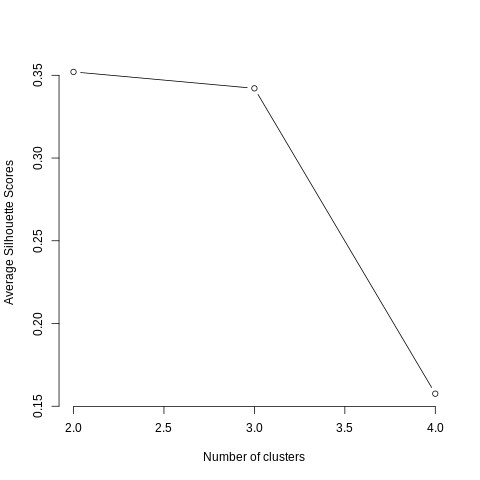

In [70]:
#D. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(datau_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(datau_scaled))
  mean(ss[, 3])
}
k <- 2:4
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [71]:
#E. K-Means Clustering dengan k=2
%%R
set.seed(26)
ku_2<-kmeans(datau_scaled, centers = 2, nstart = 25)
str(ku_2)
print(ku_2)

List of 9
 $ cluster     : Named int [1:5] 1 1 1 1 2
  ..- attr(*, "names")= chr [1:5] "Malinau" "Bulungan" "Tana Tidung" "Nunukan" ...
 $ centers     : num [1:2, 1:4] -0.392 1.567 -0.37 1.482 -0.336 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 16
 $ withinss    : num [1:2] 5.82 0
 $ tot.withinss: num 5.82
 $ betweenss   : num 10.2
 $ size        : int [1:2] 4 1
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 4, 1

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.3916292 -0.3704386 -0.3362519 -0.3246264
2  1.5665166  1.4817546  1.3450075  1.2985056

Clustering vector:
    Malinau    Bulungan Tana Tidung     Nunukan     Tarakan 
          1           1           1           1           2 

Within cluster sum of squares by cluster:
[1] 5.819084 0.000000
 (between_SS / total_SS =  63.6 %)

Available component

In [72]:
%%R
data_ku2 = as.data.frame(ku_2$cluster)
data_ku2
colnames(data_ku2)[1] = "Cluster"
data_ku2

            Cluster
Malinau           1
Bulungan          1
Tana Tidung       1
Nunukan           1
Tarakan           2


In [73]:
%%R
write.csv(data_ku2, file='/content/Data 2 Cluster Kalimantan Utara')

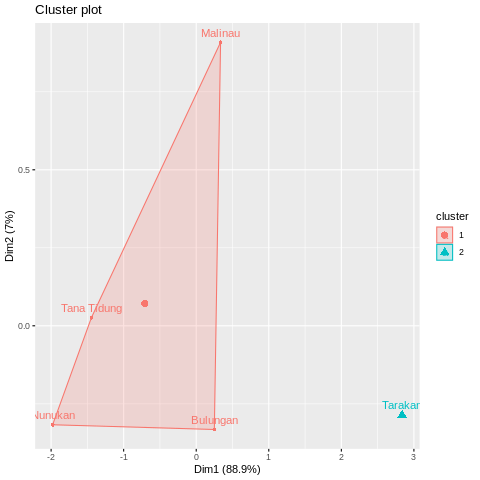

In [74]:
#F. Plot
%%R
fviz_cluster(ku_2, data = datau_scaled)

In [87]:
#G. K-Means Clustering dengan k=3
%%R
set.seed(26)
ku_3<-kmeans(datau_scaled, centers = 3, nstart = 25)
str(ku_3)
print(ku_3)

List of 9
 $ cluster     : Named int [1:5] 2 2 1 1 3
  ..- attr(*, "names")= chr [1:5] "Malinau" "Bulungan" "Tana Tidung" "Nunukan" ...
 $ centers     : num [1:3, 1:4] -0.681 -0.102 1.567 -0.881 0.14 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 16
 $ withinss    : num [1:3] 0.757 0.829 0
 $ tot.withinss: num 1.59
 $ betweenss   : num 14.4
 $ size        : int [1:3] 2 2 1
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 3 clusters of sizes 2, 2, 1

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.6812445 -0.8812540 -0.8593104 -0.9878623
2 -0.1020138  0.1403767  0.1868066  0.3386095
3  1.5665166  1.4817546  1.3450075  1.2985056

Clustering vector:
    Malinau    Bulungan Tana Tidung     Nunukan     Tarakan 
          2           2           1           1           3 

Within cluster sum of squares by cluster:
[1] 0.7571172 0

In [76]:
%%R
data_ku3 = as.data.frame(ku_3$cluster)
data_ku3
colnames(data_ku3)[1] = "Cluster"
data_ku3

            Cluster
Malinau           2
Bulungan          2
Tana Tidung       1
Nunukan           1
Tarakan           3


In [77]:
%%R
write.csv(data_ku3, file='/content/Data 3 Cluster Kalimantan Utara')

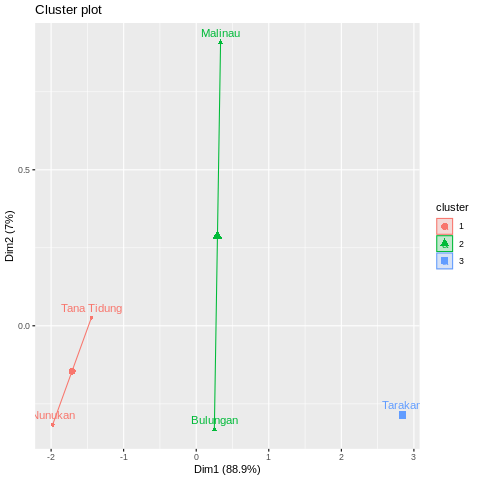

In [78]:
#H. Plot
%%R
fviz_cluster(ku_3, data = datau_scaled)

4. KALIMANTAN SELATAN

In [79]:
#A. Input Data

%%R
library(readxl)
datas <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kalsel 2022")
datas

# A tibble: 13 × 5
   `Kabupaten/Kota`      AHH   HLS   RLS   PPK
   <chr>               <dbl> <dbl> <dbl> <dbl>
 1 TANAH LAUT           69.9  12.3  7.9  11703
 2 KOTABARU             69.6  12.1  7.47 12191
 3 BANJAR               67.7  13.0  7.71 12871
 4 BARITO KUALA         66.6  12.5  7.63 10230
 5 TAPIN                70.9  12.0  7.95 12247
 6 HULU SUNGAI SELATAN  66.5  12.4  7.79 13157
 7 HULU SUNGAI TENGAH   66.5  12.2  8.28 12448
 8 HULU SUNGAI UTARA    64.5  12.9  7.76 10132
 9 TABALONG             70.8  12.9  9.12 11914
10 TANAH BUMBU          70.7  12.5  8.25 12217
11 BALANGAN             68.1  12.6  7.85 11659
12 KOTA BANJARMASIN     71.6  14.0 10.2  14770
13 KOTA BANJAR BARU     72.4  14.8 11.0  14136


In [80]:
#B. Statistika Deskriptif
%%R
summary(datas)

 Kabupaten/Kota          AHH             HLS             RLS        
 Length:13          Min.   :64.53   Min.   :12.04   Min.   : 7.470  
 Class :character   1st Qu.:66.55   1st Qu.:12.32   1st Qu.: 7.760  
 Mode  :character   Median :69.56   Median :12.54   Median : 7.900  
                    Mean   :68.91   Mean   :12.79   Mean   : 8.377  
                    3rd Qu.:70.84   3rd Qu.:12.93   3rd Qu.: 8.280  
                    Max.   :72.36   Max.   :14.83   Max.   :10.980  
      PPK       
 Min.   :10132  
 1st Qu.:11703  
 Median :12217  
 Mean   :12283  
 3rd Qu.:12871  
 Max.   :14770  


In [82]:
#Mengubah kolom Kabupaten/Kota menjadi nama baris
%%R
datas = as.data.frame(datas)
rownames(datas) = datas$'Kabupaten/Kota'
datass = datas[,2:5]
datass

                      AHH   HLS   RLS   PPK
TANAH LAUT          69.86 12.32  7.90 11703
KOTABARU            69.56 12.06  7.47 12191
BANJAR              67.73 13.02  7.71 12871
BARITO KUALA        66.55 12.54  7.63 10230
TAPIN               70.88 12.04  7.95 12247
HULU SUNGAI SELATAN 66.51 12.40  7.79 13157
HULU SUNGAI TENGAH  66.54 12.22  8.28 12448
HULU SUNGAI UTARA   64.53 12.93  7.76 10132
TABALONG            70.84 12.90  9.12 11914
TANAH BUMBU         70.70 12.49  8.25 12217
BALANGAN            68.13 12.61  7.85 11659
KOTA BANJARMASIN    71.59 13.95 10.21 14770
KOTA BANJAR BARU    72.36 14.83 10.98 14136


In [83]:
#C. Standardize the data
%%R
datas_scaled <- scale(datass)

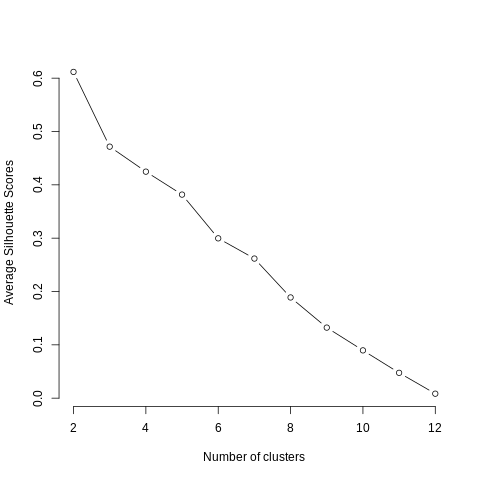

In [84]:
#D. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(datas_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(datas_scaled))
  mean(ss[, 3])
}
k <- 2:12
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [92]:
#E. K-Means Clustering dengan k=2
%%R
set.seed(37)
ks_2<-kmeans(datas_scaled, centers = 2, nstart = 25)
str(ks_2)
print(ks_2)

List of 9
 $ cluster     : Named int [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:13] "TANAH LAUT" "KOTABARU" "BANJAR" "BARITO KUALA" ...
 $ centers     : num [1:2, 1:4] -0.232 1.277 -0.366 2.011 -0.374 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 48
 $ withinss    : num [1:2] 17.03 1.04
 $ tot.withinss: num 18.1
 $ betweenss   : num 29.9
 $ size        : int [1:2] 11 2
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 11, 2

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.2321003 -0.3655675 -0.3740197 -0.3021033
2  1.2765517  2.0106210  2.0571082  1.6615682

Clustering vector:
         TANAH LAUT            KOTABARU              BANJAR        BARITO KUALA 
                  1                   1                   1                   1 
              TAPIN HULU SUNGAI SELATAN  HULU SUNGAI T

In [93]:
%%R
data_ks2 = as.data.frame(ks_2$cluster)
data_ks2
colnames(data_ks2)[1] = "Cluster"
data_ks2

                    Cluster
TANAH LAUT                1
KOTABARU                  1
BANJAR                    1
BARITO KUALA              1
TAPIN                     1
HULU SUNGAI SELATAN       1
HULU SUNGAI TENGAH        1
HULU SUNGAI UTARA         1
TABALONG                  1
TANAH BUMBU               1
BALANGAN                  1
KOTA BANJARMASIN          2
KOTA BANJAR BARU          2


In [94]:
%%R
write.csv(data_ks2, file='/content/Data 2 Cluster Kalimantan Selatan')

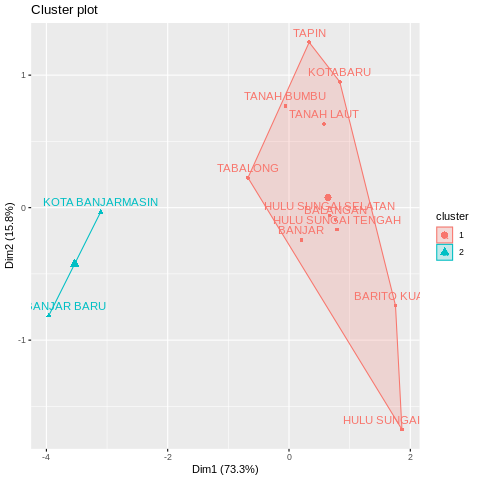

In [95]:
#F. Plot
%%R
fviz_cluster(ks_2, data = datas_scaled)

In [121]:
#G. K-Means Clustering dengan k=3
%%R
set.seed(2)
ks_3<-kmeans(datas_scaled, centers = 3, nstart = 25)
str(ks_3)
print(ks_3)

List of 9
 $ cluster     : Named int [1:13] 2 2 2 1 2 2 2 1 2 2 ...
  ..- attr(*, "names")= chr [1:13] "TANAH LAUT" "KOTABARU" "BANJAR" "BARITO KUALA" ...
 $ centers     : num [1:3, 1:4] -1.4002 0.0275 1.2766 -0.0731 -0.4306 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 48
 $ withinss    : num [1:3] 0.484 8.661 1.038
 $ tot.withinss: num 10.2
 $ betweenss   : num 37.8
 $ size        : int [1:3] 2 9 2
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 3 clusters of sizes 2, 9, 2

Cluster means:
          AHH         HLS       RLS         PPK
1 -1.40022316 -0.07312229 -0.632435 -1.60903686
2  0.02748254 -0.43055526 -0.316594 -0.01167363
3  1.27655171  2.01062098  2.057108  1.66156819

Clustering vector:
         TANAH LAUT            KOTABARU              BANJAR        BARITO KUALA 
                  2                   2                   2   

In [122]:
%%R
data_ks3 = as.data.frame(ks_3$cluster)
data_ks3
colnames(data_ks3)[1] = "Cluster"
data_ks3

                    Cluster
TANAH LAUT                2
KOTABARU                  2
BANJAR                    2
BARITO KUALA              1
TAPIN                     2
HULU SUNGAI SELATAN       2
HULU SUNGAI TENGAH        2
HULU SUNGAI UTARA         1
TABALONG                  2
TANAH BUMBU               2
BALANGAN                  2
KOTA BANJARMASIN          3
KOTA BANJAR BARU          3


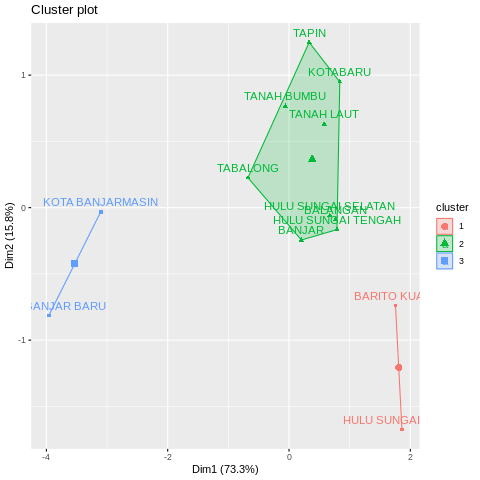

In [123]:
#H. Plot
%%R
fviz_cluster(ks_3, data = datas_scaled)

In [124]:
%%R
write.csv(data_ks3, file='/content/Data 3 Cluster Kalimantan Selatan')

5. KALIMANTAN TENGAH

In [125]:
#A. Input Data

%%R
library(readxl)
datac <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kalteng 2022")
datac

# A tibble: 14 × 5
   `Kabupaten/Kota`     AHH   HLS   RLS   PPK
   <chr>              <dbl> <dbl> <dbl> <dbl>
 1 Kotawaringin Barat  71.0  12.8  8.54 13352
 2 Kotawaringin Timur  70.2  12.9  8.16 12048
 3 Kapuas              69.0  12.9  7.64 11377
 4 Barito Selatan      67.5  12.7  9.01 11780
 5 Barito Utara        71.5  12.5  8.9  10182
 6 Sukamara            71.8  12.2  8.1   9225
 7 Lamandau            69.6  12.5  8.53 11559
 8 Seruyan             69.5  12.0  7.99  9821
 9 Katingan            66.2  13.0  8.78 11036
10 Pulang Pisau        68.4  12.5  8.26 10273
11 Gunung Mas          70.7  11.9  9.24 10990
12 Barito Timur        68.6  12.9  9.32 11710
13 Murung Raya         69.8  11.9  7.66 10697
14 Palangka Raya       73.5  15.0 11.6  14345


In [126]:
#B. Statistika Deskriptif
%%R
summary(datac)

 Kabupaten/Kota          AHH             HLS             RLS        
 Length:14          Min.   :66.16   Min.   :11.87   Min.   : 7.640  
 Class :character   1st Qu.:68.71   1st Qu.:12.24   1st Qu.: 8.115  
 Mode  :character   Median :69.69   Median :12.60   Median : 8.535  
                    Mean   :69.79   Mean   :12.68   Mean   : 8.691  
                    3rd Qu.:70.92   3rd Qu.:12.86   3rd Qu.: 8.982  
                    Max.   :73.47   Max.   :14.97   Max.   :11.550  
      PPK       
 Min.   : 9225  
 1st Qu.:10379  
 Median :11206  
 Mean   :11314  
 3rd Qu.:11762  
 Max.   :14345  


In [127]:
#Mengubah kolom Kabupaten/Kota menjadi nama baris
%%R
datac = as.data.frame(datac)
rownames(datac) = datac$'Kabupaten/Kota'
datacc = datac[,2:5]
datacc

                     AHH   HLS   RLS   PPK
Kotawaringin Barat 70.98 12.75  8.54 13352
Kotawaringin Timur 70.15 12.86  8.16 12048
Kapuas             69.02 12.94  7.64 11377
Barito Selatan     67.48 12.67  9.01 11780
Barito Utara       71.50 12.53  8.90 10182
Sukamara           71.80 12.15  8.10  9225
Lamandau           69.62 12.51  8.53 11559
Seruyan            69.46 12.02  7.99  9821
Katingan           66.16 12.97  8.78 11036
Pulang Pisau       68.36 12.50  8.26 10273
Gunung Mas         70.72 11.91  9.24 10990
Barito Timur       68.61 12.86  9.32 11710
Murung Raya        69.75 11.87  7.66 10697
Palangka Raya      73.47 14.97 11.55 14345


In [128]:
#C. Standardize the data
%%R
datac_scaled <- scale(datacc)

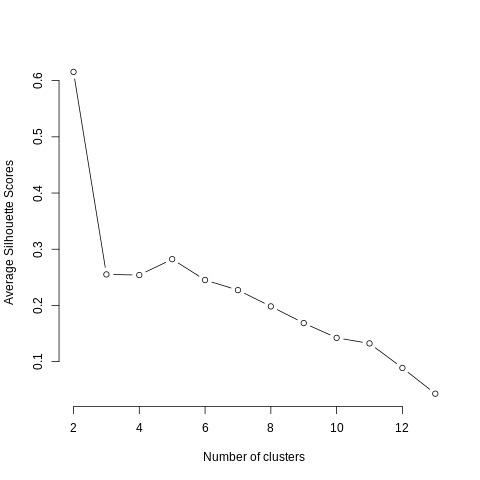

In [129]:
#C. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(datac_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(datac_scaled))
  mean(ss[, 3])
}
k <- 2:13
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [141]:
#E. K-Means Clustering dengan k=2
%%R
set.seed(4)
kc_2<-kmeans(datac_scaled, centers = 2, nstart = 25)
str(kc_2)
print(kc_2)

List of 9
 $ cluster     : Named int [1:14] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:14] "Kotawaringin Barat" "Kotawaringin Timur" "Kapuas" "Barito Selatan" ...
 $ centers     : num [1:2, 1:4] -0.151 1.964 -0.232 3.013 -0.224 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 52
 $ withinss    : num [1:2] 23.6 0
 $ tot.withinss: num 23.6
 $ betweenss   : num 28.4
 $ size        : int [1:2] 13 1
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 13, 1

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.1510867 -0.2317597 -0.2238068 -0.1721822
2  1.9641269  3.0128756  2.9094886  2.2383684

Clustering vector:
Kotawaringin Barat Kotawaringin Timur             Kapuas     Barito Selatan 
                 1                  1                  1                  1 
      Barito Utara           Sukamara         

In [142]:
%%R
data_kc2 = as.data.frame(kc_2$cluster)
data_kc2
colnames(data_kc2)[1] = "Cluster"
data_kc2

                   Cluster
Kotawaringin Barat       1
Kotawaringin Timur       1
Kapuas                   1
Barito Selatan           1
Barito Utara             1
Sukamara                 1
Lamandau                 1
Seruyan                  1
Katingan                 1
Pulang Pisau             1
Gunung Mas               1
Barito Timur             1
Murung Raya              1
Palangka Raya            2


In [143]:
%%R
write.csv(data_kc2, file='/content/Data 2 Cluster Kalimantan Tengah')

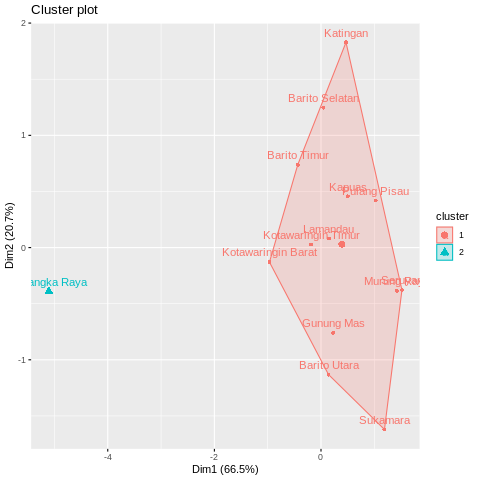

In [144]:
#F. Plot
%%R
fviz_cluster(kc_2, data = datac_scaled)

In [154]:
#G. K-Means Clustering dengan k=3
%%R
set.seed(1003)
kc_3<-kmeans(datac_scaled, centers = 3, nstart = 25)
str(kc_3)
print(kc_3)

List of 9
 $ cluster     : Named int [1:14] 1 1 1 1 2 2 1 2 1 1 ...
  ..- attr(*, "names")= chr [1:14] "Kotawaringin Barat" "Kotawaringin Timur" "Kapuas" "Barito Selatan" ...
 $ centers     : num [1:3, 1:4] -0.531 0.456 1.964 0.103 -0.767 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 52
 $ withinss    : num [1:3] 9.98 4.6 0
 $ tot.withinss: num 14.6
 $ betweenss   : num 37.4
 $ size        : int [1:3] 8 5 1
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 3 clusters of sizes 8, 5, 1

Cluster means:
         AHH        HLS        RLS        PPK
1 -0.5306956  0.1028718 -0.1643040  0.2421800
2  0.4562876 -0.7671700 -0.3190114 -0.8351617
3  1.9641269  3.0128756  2.9094886  2.2383684

Clustering vector:
Kotawaringin Barat Kotawaringin Timur             Kapuas     Barito Selatan 
                 1                  1                  1           

In [155]:
%%R
data_kc3 = as.data.frame(kc_3$cluster)
data_kc3
colnames(data_kc3)[1] = "Cluster"
data_kc3

                   Cluster
Kotawaringin Barat       1
Kotawaringin Timur       1
Kapuas                   1
Barito Selatan           1
Barito Utara             2
Sukamara                 2
Lamandau                 1
Seruyan                  2
Katingan                 1
Pulang Pisau             1
Gunung Mas               2
Barito Timur             1
Murung Raya              2
Palangka Raya            3


In [156]:
%%R
write.csv(data_kc3, file='/content/Data 3 Cluster Kalimantan Tengah')

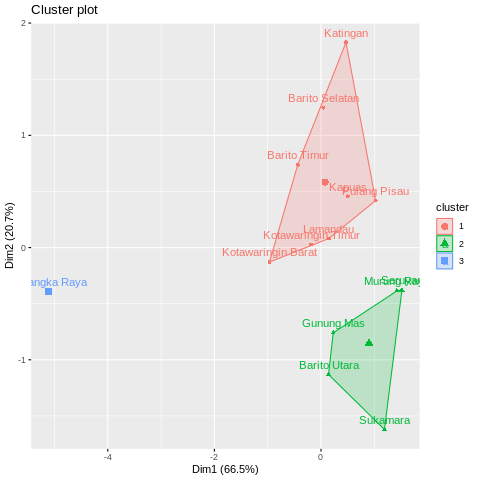

In [157]:
#H. Plot
%%R
fviz_cluster(kc_3, data = datac_scaled)

CLUSTER KALIMANTAN

1.   Kalimantan Barat
2.   Kalimantan Timur
3.   Kalimantan Utara
4.   Kalimantan Selatan
5.   Kalimantan Tengah



In [158]:
#A. Input Data

%%R
data <- read_excel("/content/IPM Kalimantan 2022.xlsx", sheet = "Kalimantan")
data

# A tibble: 55 × 5
   `Kabupaten/Kota`   AHH   HLS   RLS   PPK
   <chr>            <dbl> <dbl> <dbl> <dbl>
 1 Sambas            69.4  12.7  6.74 10462
 2 Bengkayang        74    12.1  7     9484
 3 Landak            73.4  12.4  7.15  7969
 4 Mempawah          71.5  12.9  7.17  8049
 5 Sanggau           71.6  11.6  7.41  8782
 6 Ketapang          71.3  12.0  7.48  9426
 7 Sintang           72.1  12.3  7.36  8858
 8 Kapuas Hulu       72.7  12.1  7.59  7668
 9 Sekadau           72.4  11.9  7.12  7566
10 Melawi            73.1  11.2  7.18  8830
# ℹ 45 more rows
# ℹ Use `print(n = ...)` to see more rows


In [159]:

#B. Statistika Deskriptif
%%R
summary(data)

 Kabupaten/Kota          AHH             HLS             RLS        
 Length:55          Min.   :64.53   Min.   :11.18   Min.   : 6.210  
 Class :character   1st Qu.:69.51   1st Qu.:12.26   1st Qu.: 7.635  
 Mode  :character   Median :71.47   Median :12.70   Median : 8.250  
                    Mean   :70.93   Mean   :12.83   Mean   : 8.496  
                    3rd Qu.:72.67   3rd Qu.:13.06   3rd Qu.: 9.220  
                    Max.   :74.78   Max.   :15.10   Max.   :11.550  
      PPK       
 Min.   : 7446  
 1st Qu.: 9562  
 Median :11322  
 Mean   :11175  
 3rd Qu.:12204  
 Max.   :17327  


In [160]:
#Mengubah kolom Kabupaten/Kota menjadi nama baris
%%R
data = as.data.frame(data)
rownames(data) = data$'Kabupaten/Kota'
dataa = data[,2:5]
dataa

                      AHH   HLS   RLS   PPK
Sambas              69.39 12.70  6.74 10462
Bengkayang          74.00 12.14  7.00  9484
Landak              73.39 12.44  7.15  7969
Mempawah            71.47 12.87  7.17  8049
Sanggau             71.58 11.65  7.41  8782
Ketapang            71.27 11.95  7.48  9426
Sintang             72.12 12.29  7.36  8858
Kapuas Hulu         72.69 12.14  7.59  7668
Sekadau             72.39 11.90  7.12  7566
Melawi              73.14 11.18  7.18  8830
Kayong Utara        68.82 11.95  6.21  8234
Kubu Raya           70.95 13.88  7.02  9142
Kota Pontianak      73.46 15.02 10.44 15141
Kota Singkawang     72.46 12.92  8.19 12089
Paser               72.89 13.27  8.80 11181
Kutai Barat         73.10 13.09  8.78 10740
Kutai Kartanegara   72.65 13.63  9.24 11677
Kutai Timur         73.47 13.00  9.44 11322
Berau               72.32 13.35  9.54 13095
Penajam Paser Utara 71.71 12.70  8.51 11890
Balikpapan          74.78 14.23 10.92 15455
Samarinda           74.56 15.10 

In [161]:
#C. Standardize the data
%%R
data_scaled <- scale(dataa)

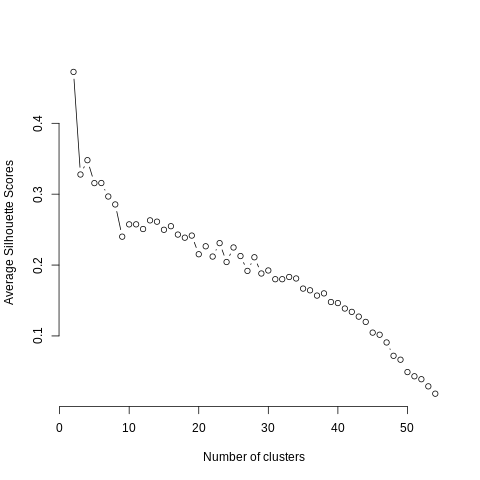

In [162]:
#D. Optimal Number of Cluster
#Silhouette Method
%%R
silhouette_score <- function(k){
  km <- kmeans(data_scaled, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(data_scaled))
  mean(ss[, 3])
}
k <- 2:54
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

In [170]:
#E. K-Means Clustering dengan k=2
%%R
set.seed(37)
kk_2<-kmeans(data_scaled, centers = 2, nstart = 25)
str(kk_2)
print(kk_2)

List of 9
 $ cluster     : Named int [1:55] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:55] "Sambas" "Bengkayang" "Landak" "Mempawah" ...
 $ centers     : num [1:2, 1:4] -0.229 1.03 -0.362 1.628 -0.36 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 216
 $ withinss    : num [1:2] 97.4 17
 $ tot.withinss: num 114
 $ betweenss   : num 102
 $ size        : int [1:2] 45 10
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 2 clusters of sizes 45, 10

Cluster means:
        AHH        HLS        RLS        PPK
1 -0.228852 -0.3618788 -0.3601839 -0.3121808
2  1.029834  1.6284547  1.6208274  1.4048134

Clustering vector:
             Sambas          Bengkayang              Landak            Mempawah 
                  1                   1                   1                   1 
            Sanggau            Ketapang             Sintang        

In [171]:
%%R
data_cluster2 = as.data.frame(kk_2$cluster)
colnames(data_cluster2)[1] = "Cluster"
data_cluster2 = cbind(KabupatenKota = rownames(data_cluster2), data_cluster2)
rownames(data_cluster2) = 1:nrow(data_cluster2)
colnames(data_cluster2)[1] = "Kabupaten/Kota"
data_cluster2 = data_cluster2[order(data_cluster2$Cluster, decreasing = FALSE),]
data_cluster2

        Kabupaten/Kota Cluster
1               Sambas       1
2           Bengkayang       1
3               Landak       1
4             Mempawah       1
5              Sanggau       1
6             Ketapang       1
7              Sintang       1
8          Kapuas Hulu       1
9              Sekadau       1
10              Melawi       1
11        Kayong Utara       1
12           Kubu Raya       1
14     Kota Singkawang       1
15               Paser       1
16         Kutai Barat       1
18         Kutai Timur       1
20 Penajam Paser Utara       1
24             Malinau       1
25            Bulungan       1
26         Tana Tidung       1
27             Nunukan       1
29          TANAH LAUT       1
30            KOTABARU       1
31              BANJAR       1
32        BARITO KUALA       1
33               TAPIN       1
34 HULU SUNGAI SELATAN       1
35  HULU SUNGAI TENGAH       1
36   HULU SUNGAI UTARA       1
37            TABALONG       1
38         TANAH BUMBU       1
39      

In [172]:
%%R
write.csv(data_cluster2, file='/content/Data 2 Cluster Kalimantan')

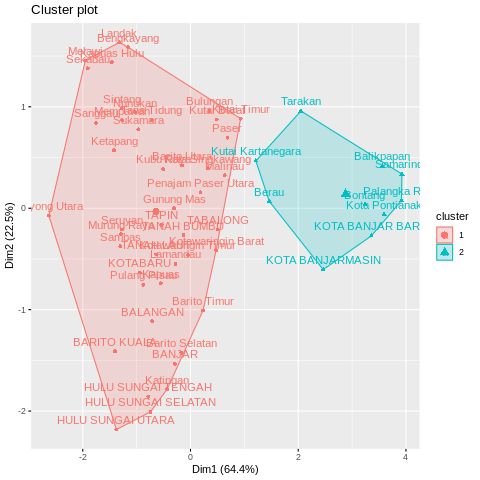

In [173]:
#F. Plot
%%R
fviz_cluster(kk_2, data = data_scaled)

In [187]:
#G. K-Means Clustering dengan k=4
%%R
set.seed(8)
kk_4<-kmeans(data_scaled, centers = 4, nstart = 25)
str(kk_4)
print(kk_4)

List of 9
 $ cluster     : Named int [1:55] 1 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:55] "Sambas" "Bengkayang" "Landak" "Mempawah" ...
 $ centers     : num [1:4, 1:4] -1.094 0.405 0.437 1.124 -0.356 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:4] "AHH" "HLS" "RLS" "PPK"
 $ totss       : num 216
 $ withinss    : num [1:4] 19.9 15.8 10.2 10.8
 $ tot.withinss: num 56.7
 $ betweenss   : num 159
 $ size        : int [1:4] 19 14 14 8
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
K-means clustering with 4 clusters of sizes 19, 14, 14, 8

Cluster means:
         AHH        HLS        RLS        PPK
1 -1.0935987 -0.3559455 -0.3932452  0.1212995
2  0.4049954 -0.6731461 -0.8865643 -1.2239282
3  0.4368259  0.1023842  0.3685552  0.1343886
4  1.1241095  1.8442038  1.8404733  1.6186082

Clustering vector:
             Sambas          Bengkayang              Landak            Mempawah 
                  1

In [188]:
%%R
data_cluster4 = as.data.frame(kk_4$cluster)
colnames(data_cluster4)[1] = "Cluster"
data_cluster4 = cbind(KabupatenKota = rownames(data_cluster4), data_cluster4)
rownames(data_cluster4) = 1:nrow(data_cluster4)
colnames(data_cluster4)[1] = "Kabupaten/Kota"
data_cluster4 = data_cluster4[order(data_cluster4$Cluster, decreasing = FALSE),]
data_cluster4

        Kabupaten/Kota Cluster
1               Sambas       1
29          TANAH LAUT       1
30            KOTABARU       1
31              BANJAR       1
32        BARITO KUALA       1
33               TAPIN       1
34 HULU SUNGAI SELATAN       1
35  HULU SUNGAI TENGAH       1
36   HULU SUNGAI UTARA       1
39            BALANGAN       1
43  Kotawaringin Timur       1
44              Kapuas       1
45      Barito Selatan       1
48            Lamandau       1
49             Seruyan       1
50            Katingan       1
51        Pulang Pisau       1
53        Barito Timur       1
54         Murung Raya       1
2           Bengkayang       2
3               Landak       2
4             Mempawah       2
5              Sanggau       2
6             Ketapang       2
7              Sintang       2
8          Kapuas Hulu       2
9              Sekadau       2
10              Melawi       2
11        Kayong Utara       2
12           Kubu Raya       2
26         Tana Tidung       2
27      

In [189]:
%%R
write.csv(data_cluster4, file='/content/Data 4 Cluster Kalimantan')

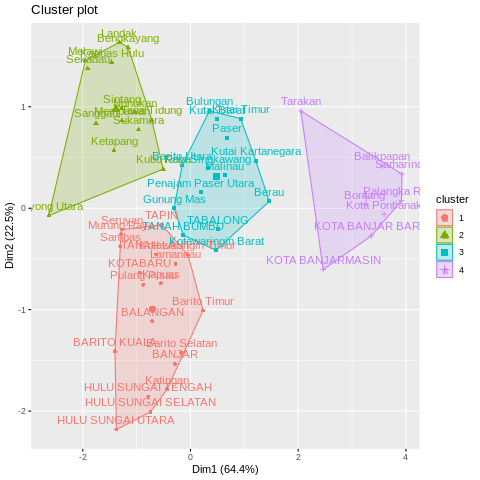

In [190]:
#H. Plot
%%R
fviz_cluster(kk_4, data = data_scaled)

MEMBUAT PETA HASIL CLUSTER

In [191]:
%%R
install.packages("sf")

(as ‘lib’ is unspecified)







































	‘/tmp/RtmpanNQhI/downloaded_packages’



In [192]:
%%R
library("sf")
library("ggplot2")

In [193]:
import pandas as pd

A. Cluster Kalimantan

In [305]:
#Pre-Processing Data
datap = pd.read_csv("/content/data.csv")
datap

NAME_1                                           geometry
0            Bengkayang  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...
1           Kapuas Hulu  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...
2          Kayong Utara  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....
3              Ketapang  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...
4        Kota Pontianak  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....
5             Kubu Raya  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....
6                Landak  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...
7                Melawi  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...
8             Pontianak  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...
9                Sambas  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...
10              Sanggau  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....
11              Sekadau  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....
12           Singkawang  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...
13              Sintang  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....
14             Balangan  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....
15               Banjar  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....
16          Banjar Baru  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....
17          Banjarmasin  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....
18         Barito Kuala  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....
19  Hulu Sungai Selatan  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....
20   Hulu Sungai Tengah  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....
21    Hulu Sungai Utara  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....
22            Kota Baru  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...
23             Tabalong  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...
24          Tanah Bumbu  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...
25           Tanah Laut  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....
26                Tapin  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....
27       Barito Selatan  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....
28         Barito Timur  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....
29         Barito Utara  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....
30           Gunung Mas  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....
31               Kapuas  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....
32             Katingan  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....
33   Kotawaringin Barat  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....
34   Kotawaringin Timur  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....
35             Lamandau  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....
36          Murung Raya  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....
37        Palangka Raya  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....
38         Pulang Pisau  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....
39              Seruyan  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...
40             Sukamara  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...
41           Balikpapan  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....
42                Berau  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...
43              Bontang  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...
44          Kutai Barat  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....
45    Kutai Kartanegara  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....
46          Kutai Timur  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...
47                Paser  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...
48  Penajam Paser Utara  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....
49            Samarinda  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...
50             Bulungan  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...
51              Malinau  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...
52              Nunukan  MULTIPOLYGON (((1

In [306]:
datap["NAME_1"][8] = "Mempawah"
datap["NAME_1"][12] = "Kota Singkawang"
datap["NAME_1"][16] = "Kota Banjar Baru"
datap["NAME_1"][17] = "Kota Banjarmasin"
datap["NAME_1"][22] = "Kotabaru"

In [307]:
datap.rename(columns={"NAME_1":"KabupatenKota"}, inplace = True)
datap.iloc[:,0] = datap.iloc[:,0].str.upper()

In [308]:
data1 = datap.copy()

In [309]:
data1.iloc[5,] = datap.iloc[12,]
data1.iloc[6,] = datap.iloc[5,]
data1.iloc[7,] = datap.iloc[6,]
data1.iloc[8,] = datap.iloc[7,]
data1.iloc[9,] = datap.iloc[8,]
data1.iloc[10,] = datap.iloc[9,]
data1.iloc[11,] = datap.iloc[10,]
data1.iloc[12,] = datap.iloc[11,]
data1.iloc[16,] = datap.iloc[18,]
data1.iloc[17,] = datap.iloc[19,]
data1.iloc[18,] = datap.iloc[20,]
data1.iloc[19,] = datap.iloc[21,]
data1.iloc[20,] = datap.iloc[16,]
data1.iloc[21,] = datap.iloc[17,]

In [311]:
data1

KabupatenKota                                           geometry
0            BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...
1           KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...
2          KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....
3              KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...
4        KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....
5       KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...
6             KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....
7                LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...
8                MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...
9              MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...
10               SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...
11              SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....
12              SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....
13              SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....
14             BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....
15               BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....
16         BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....
17  HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....
18   HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....
19    HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....
20     KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....
21     KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....
22             KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...
23             TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...
24          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...
25           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....
26                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....
27       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....
28         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....
29         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....
30           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....
31               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....
32             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....
33   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....
34   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....
35             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....
36          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....
37        PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....
38         PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....
39              SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...
40             SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...
41           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....
42                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...
43              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...
44          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....
45    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....
46          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...
47                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...
48  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....
49            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...
50             BULUNGAN  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...
51              MALINAU  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...
52              NUNUKAN  MULTIPOLYG

- Clustering dengan k = 2

In [312]:
data2c_kalimantan = pd.read_csv("/content/Data 2 Cluster Kalimantan")
data2c_kalimantan.rename(columns={"Kabupaten/Kota":"KabupatenKota"}, inplace = True)
data2c_kalimantan

Unnamed: 0        KabupatenKota  Cluster
0            1               Sambas        1
1            2           Bengkayang        1
2            3               Landak        1
3            4             Mempawah        1
4            5              Sanggau        1
5            6             Ketapang        1
6            7              Sintang        1
7            8          Kapuas Hulu        1
8            9              Sekadau        1
9           10               Melawi        1
10          11         Kayong Utara        1
11          12            Kubu Raya        1
12          14      Kota Singkawang        1
13          15                Paser        1
14          16          Kutai Barat        1
15          18          Kutai Timur        1
16          20  Penajam Paser Utara        1
17          24              Malinau        1
18          25             Bulungan        1
19          26          Tana Tidung        1
20          27              Nunukan        1
21          29           TANAH LAUT        1
22          30             KOTABARU        1
23          31               BANJAR        1
24          32         BARITO KUALA        1
25          33                TAPIN        1
26          34  HULU SUNGAI SELATAN        1
27          35   HULU SUNGAI TENGAH        1
28          36    HULU SUNGAI UTARA        1
29          37             TABALONG        1
30          38          TANAH BUMBU        1
31          39             BALANGAN        1
32          42   Kotawaringin Barat        1
33          43   Kotawaringin Timur        1
34          44               Kapuas        1
35          45       Barito Selatan        1
36          46         Barito Utara        1
37          47             Sukamara        1
38          48             Lamandau        1
39          49              Seruyan        1
40          50             Katingan        1
41          51         Pulang Pisau        1
42          52           Gunung Mas        1
43          53         Barito Timur        1
44          54          Murung Raya        1
45          13       Kota Pontianak        2
46          17    Kutai Kartanegara        2
47          19                Berau        2
48          21           Balikpapan        2
49          22            Samarinda        2
50          23              Bontang        2
51          28              Tarakan        2
52          40     KOTA BANJARMASIN        2
53          41     KOTA BANJAR BARU        2
54          55        Palangka Raya        2

In [313]:
data2c_kalimantan.iloc[:,1] = data2c_kalimantan.iloc[:,1].str.upper()
data2c_kalimantan = pd.merge(data1, data2c_kalimantan, how = 'left', on = data1.columns[0])
data2c_kalimantan

KabupatenKota                                           geometry  \
0            BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...   
1           KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...   
2          KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....   
3              KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...   
4        KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....   
5       KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...   
6             KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....   
7                LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...   
8                MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...   
9              MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...   
10               SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...   
11              SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....   
12              SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....   
13              SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....   
14             BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....   
15               BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....   
16         BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....   
17  HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....   
18   HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....   
19    HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....   
20     KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....   
21     KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....   
22             KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...   
23             TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...   
24          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...   
25           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....   
26                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....   
27       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....   
28         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....   
29         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....   
30           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....   
31               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....   
32             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....   
33   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....   
34   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....   
35             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....   
36          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....   
37        PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....   
38         PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....   
39              SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...   
40             SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...   
41           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....   
42                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...   
43              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...   
44          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....   
45    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....   
46          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...   
47                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...   
48  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....   
49            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...   
50             BULUNGAN  MULTIPO

In [314]:
data2c_kalimantan.to_csv("/content/Data 2 Cluster Kalimantan_merged.csv")

In [315]:
%%R
data2ck

    X       KabupatenKota
1   0          BENGKAYANG
2   1         KAPUAS HULU
3   2        KAYONG UTARA
4   3            KETAPANG
5   4      KOTA PONTIANAK
6   5     KOTA SINGKAWANG
7   6     KOTA SINGKAWANG
8   7           KUBU RAYA
9   8              LANDAK
10  9            MEMPAWAH
11 10            MEMPAWAH
12 11              SAMBAS
13 12             SANGGAU
14 13             SINTANG
15 14            BALANGAN
16 15              BANJAR
17 16  HULU SUNGAI TENGAH
18 17   HULU SUNGAI UTARA
19 18    KOTA BANJAR BARU
20 19    KOTA BANJARMASIN
21 20    KOTA BANJAR BARU
22 21    KOTA BANJARMASIN
23 22            KOTABARU
24 23            TABALONG
25 24         TANAH BUMBU
26 25          TANAH LAUT
27 26               TAPIN
28 27      BARITO SELATAN
29 28        BARITO TIMUR
30 29        BARITO UTARA
31 30          GUNUNG MAS
32 31              KAPUAS
33 32            KATINGAN
34 33  KOTAWARINGIN BARAT
35 34  KOTAWARINGIN TIMUR
36 35            LAMANDAU
37 36         MURUNG RAYA
38 37       

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



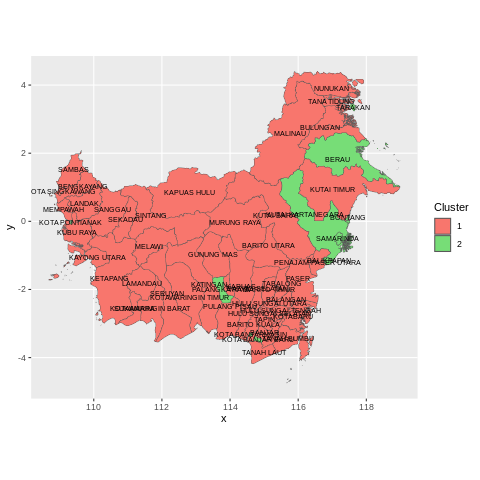

In [316]:
%%R
data2ck <- read.csv("/content/Data 2 Cluster Kalimantan_merged.csv")

rownames(data2ck) = data2ck$KabupatenKota
data2ck$Cluster = as.character(data2ck$Cluster)

data2ck <- st_as_sf(data2ck, wkt = "geometry")

p = ggplot(data2ck, aes(label = rownames(data2ck))) +
  geom_sf(data = data2ck, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k = 4

In [317]:
data4c_kalimantan = pd.read_csv("/content/Data 4 Cluster Kalimantan")
data4c_kalimantan.rename(columns = {'Kabupaten/Kota' : 'KabupatenKota'}, inplace = True)
data4c_kalimantan

Unnamed: 0        KabupatenKota  Cluster
0            1               Sambas        1
1           29           TANAH LAUT        1
2           30             KOTABARU        1
3           31               BANJAR        1
4           32         BARITO KUALA        1
5           33                TAPIN        1
6           34  HULU SUNGAI SELATAN        1
7           35   HULU SUNGAI TENGAH        1
8           36    HULU SUNGAI UTARA        1
9           39             BALANGAN        1
10          43   Kotawaringin Timur        1
11          44               Kapuas        1
12          45       Barito Selatan        1
13          48             Lamandau        1
14          49              Seruyan        1
15          50             Katingan        1
16          51         Pulang Pisau        1
17          53         Barito Timur        1
18          54          Murung Raya        1
19           2           Bengkayang        2
20           3               Landak        2
21           4             Mempawah        2
22           5              Sanggau        2
23           6             Ketapang        2
24           7              Sintang        2
25           8          Kapuas Hulu        2
26           9              Sekadau        2
27          10               Melawi        2
28          11         Kayong Utara        2
29          12            Kubu Raya        2
30          26          Tana Tidung        2
31          27              Nunukan        2
32          47             Sukamara        2
33          14      Kota Singkawang        3
34          15                Paser        3
35          16          Kutai Barat        3
36          17    Kutai Kartanegara        3
37          18          Kutai Timur        3
38          19                Berau        3
39          20  Penajam Paser Utara        3
40          24              Malinau        3
41          25             Bulungan        3
42          37             TABALONG        3
43          38          TANAH BUMBU        3
44          42   Kotawaringin Barat        3
45          46         Barito Utara        3
46          52           Gunung Mas        3
47          13       Kota Pontianak        4
48          21           Balikpapan        4
49          22            Samarinda        4
50          23              Bontang        4
51          28              Tarakan        4
52          40     KOTA BANJARMASIN        4
53          41     KOTA BANJAR BARU        4
54          55        Palangka Raya        4

In [318]:
data4c_kalimantan.iloc[:,1] = data4c_kalimantan.iloc[:,1].str.upper()
data4c_kalimantan = pd.merge(data1, data4c_kalimantan, how = 'left', on = data1.columns[0])
data4c_kalimantan

KabupatenKota                                           geometry  \
0            BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...   
1           KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...   
2          KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....   
3              KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...   
4        KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....   
5       KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...   
6             KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....   
7                LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...   
8                MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...   
9              MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...   
10               SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...   
11              SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....   
12              SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....   
13              SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....   
14             BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....   
15               BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....   
16         BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....   
17  HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....   
18   HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....   
19    HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....   
20     KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....   
21     KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....   
22             KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...   
23             TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...   
24          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...   
25           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....   
26                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....   
27       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....   
28         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....   
29         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....   
30           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....   
31               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....   
32             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....   
33   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....   
34   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....   
35             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....   
36          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....   
37        PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....   
38         PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....   
39              SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...   
40             SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...   
41           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....   
42                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...   
43              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...   
44          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....   
45    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....   
46          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...   
47                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...   
48  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....   
49            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...   
50             BULUNGAN  MULTIPO

In [319]:
data4c_kalimantan.to_csv("/content/Data 4 Cluster Kalimantan_merged.csv")

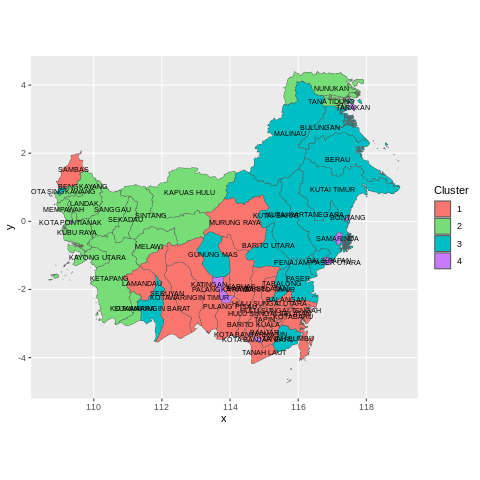

In [320]:
%%R
data4ck <- read.csv("/content/Data 4 Cluster Kalimantan_merged.csv")

rownames(data4ck) = data4ck[,2]
data4ck$Cluster = as.character(data4ck$Cluster)

data4ck <- st_as_sf(data4ck, wkt = "geometry")

p = ggplot(data4ck, aes(label = rownames(data4ck))) +
  geom_sf(data = data4ck, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4", "#C77CFF"))

p+geom_sf_text(size = 2.5)

B. Cluster Tiap Provinsi

1. Kalimantan Barat

In [321]:
data1

KabupatenKota                                           geometry
0            BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...
1           KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...
2          KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....
3              KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...
4        KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....
5       KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...
6             KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....
7                LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...
8                MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...
9              MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...
10               SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...
11              SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....
12              SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....
13              SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....
14             BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....
15               BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....
16         BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....
17  HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....
18   HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....
19    HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....
20     KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....
21     KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....
22             KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...
23             TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...
24          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...
25           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....
26                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....
27       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....
28         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....
29         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....
30           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....
31               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....
32             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....
33   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....
34   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....
35             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....
36          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....
37        PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....
38         PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....
39              SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...
40             SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...
41           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....
42                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...
43              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...
44          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....
45    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....
46          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...
47                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...
48  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....
49            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...
50             BULUNGAN  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...
51              MALINAU  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...
52              NUNUKAN  MULTIPOLYG

In [322]:
#Pre-Processing Data
geokb=data1.iloc[0:14,:]
geokb



KabupatenKota                                           geometry
0        BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...
1       KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...
2      KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....
3          KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...
4    KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....
5   KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...
6         KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....
7            LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...
8            MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...
9          MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...
10           SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...
11          SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....
12          SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....
13          SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....

- Cluster dengan k=2

In [323]:
data2c_kalbar = pd.read_csv("/content/Data 2 Cluster Kalimantan Barat")
data2c_kalbar

Unnamed: 0  Cluster
0        Bengkayang        1
1       Kapuas Hulu        1
2      Kayong Utara        1
3          Ketapang        1
4    Kota Pontianak        2
5   Kota Singkawang        1
6         Kubu Raya        1
7            Landak        1
8            Melawi        1
9          Mempawah        1
10           Sambas        1
11          Sanggau        1
12          Sekadau        1
13          Sintang        1

In [324]:
data2c_kalbar.iloc[:,0] = data2c_kalbar.iloc[:,0].str.upper()
data2c_kalbar.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data2c_kalbar

KabupatenKota  Cluster
0        BENGKAYANG        1
1       KAPUAS HULU        1
2      KAYONG UTARA        1
3          KETAPANG        1
4    KOTA PONTIANAK        2
5   KOTA SINGKAWANG        1
6         KUBU RAYA        1
7            LANDAK        1
8            MELAWI        1
9          MEMPAWAH        1
10           SAMBAS        1
11          SANGGAU        1
12          SEKADAU        1
13          SINTANG        1

In [325]:
data2c_kalbar_merged= pd.merge(geokb, data2c_kalbar, how = 'left', on = geokb.columns[0])
data2c_kalbar_merged

KabupatenKota                                           geometry  \
0        BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...   
1       KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...   
2      KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....   
3          KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...   
4    KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....   
5   KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...   
6         KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....   
7            LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...   
8            MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...   
9          MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...   
10           SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...   
11          SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....   
12          SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....   
13          SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....   

    Cluster  
0         1  
1         1  
2         1  
3         1  
4         2  
5         1  
6         1  
7         1  
8         1  
9         1  
10        1  
11        1  
12        1  
13        1

In [326]:
data2c_kalbar_merged.to_csv("/content/Data 2 Cluster Kalbar_merged.csv")

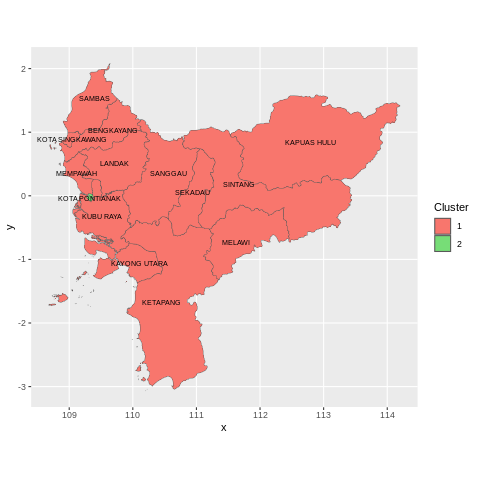

In [327]:
%%R
data2ckb <- read.csv("/content/Data 2 Cluster Kalbar_merged.csv")

rownames(data2ckb) = data2ckb[,2]
data2ckb$Cluster = as.character(data2ckb$Cluster)

data2ckb <- st_as_sf(data2ckb, wkt = "geometry")

p = ggplot(data2ckb, aes(label = rownames(data2ckb))) +
  geom_sf(data = data2ckb, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k=3

In [334]:
data3c_kalbar = pd.read_csv("/content/Data 3 Cluster Kalimantan Barat")
data3c_kalbar.iloc[:,0] = data3c_kalbar.iloc[:,0].str.upper()
data3c_kalbar.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data3c_kalbar

KabupatenKota  Cluster
0        BENGKAYANG        2
1       KAPUAS HULU        2
2      KAYONG UTARA        1
3          KETAPANG        2
4    KOTA PONTIANAK        3
5   KOTA SINGKAWANG        2
6         KUBU RAYA        1
7            LANDAK        2
8            MELAWI        2
9          MEMPAWAH        2
10           SAMBAS        1
11          SANGGAU        2
12          SEKADAU        2
13          SINTANG        2

In [335]:
data3c_kalbar_merged= pd.merge(geokb, data3c_kalbar, how = 'left', on = geokb.columns[0])
data3c_kalbar_merged

KabupatenKota                                           geometry  \
0        BENGKAYANG  MULTIPOLYGON (((109.0307 0.5719, 109.0315 0.57...   
1       KAPUAS HULU  MULTIPOLYGON (((112.1467 0.0799, 112.1385 0.08...   
2      KAYONG UTARA  MULTIPOLYGON (((108.7714 -1.7008, 108.7839 -1....   
3          KETAPANG  MULTIPOLYGON (((110.092 -2.8938, 110.0936 -2.8...   
4    KOTA PONTIANAK  MULTIPOLYGON (((109.3603 -0.0715, 109.3431 -0....   
5   KOTA SINGKAWANG  MULTIPOLYGON (((108.9613 0.8085, 108.9511 0.81...   
6         KUBU RAYA  MULTIPOLYGON (((109.2527 -0.9468, 109.2483 -0....   
7            LANDAK  MULTIPOLYGON (((109.6316 0.0352, 109.6293 0.03...   
8            MELAWI  MULTIPOLYGON (((111.2614 -1.0916, 111.241 -1.0...   
9          MEMPAWAH  MULTIPOLYGON (((109.3163 0.0366, 109.3093 0.03...   
10           SAMBAS  MULTIPOLYGON (((109.0812 0.9991, 109.0758 0.99...   
11          SANGGAU  MULTIPOLYGON (((110.0149 -0.4551, 110.0145 -0....   
12          SEKADAU  MULTIPOLYGON (((110.6983 -0.6328, 110.6782 -0....   
13          SINTANG  MULTIPOLYGON (((112.4552 -0.6532, 112.4506 -0....   

    Cluster  
0         2  
1         2  
2         1  
3         2  
4         3  
5         2  
6         1  
7         2  
8         2  
9         2  
10        1  
11        2  
12        2  
13        2

In [336]:
data3c_kalbar_merged.to_csv("/content/Data 3 Cluster Kalbar_merged.csv")

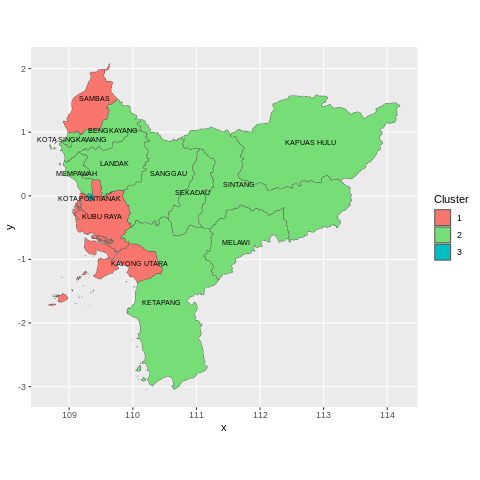

In [338]:
%%R
data3ckb <- read.csv("/content/Data 3 Cluster Kalbar_merged.csv")

rownames(data3ckb) = data3ckb[,2]
data3ckb$Cluster = as.character(data3ckb$Cluster)

data3ckb <- st_as_sf(data3ckb, wkt = "geometry")

p = ggplot(data3ckb, aes(label = rownames(data3ckb))) +
  geom_sf(data = data3ckb, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4"))

p+geom_sf_text(size = 2.5)

2. Kalimantan Timur

In [339]:
#Pre-Processing Data
geokt=data1.iloc[41:50,:]
geokt



KabupatenKota                                           geometry
41           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....
42                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...
43              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...
44          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....
45    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....
46          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...
47                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...
48  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....
49            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...

- Cluster dengan k=2

In [340]:
data2c_kaltim = pd.read_csv("/content/Data 2 Cluster Kalimantan Timur")
data2c_kaltim

Unnamed: 0  Cluster
0                Paser        1
1          Kutai Barat        1
2    Kutai Kartanegara        1
3          Kutai Timur        1
4                Berau        1
5  Penajam Paser Utara        1
6           Balikpapan        2
7            Samarinda        2
8              Bontang        2

In [341]:
data2c_kaltim.iloc[:,0] = data2c_kaltim.iloc[:,0].str.upper()
data2c_kaltim.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data2c_kaltim

KabupatenKota  Cluster
0                PASER        1
1          KUTAI BARAT        1
2    KUTAI KARTANEGARA        1
3          KUTAI TIMUR        1
4                BERAU        1
5  PENAJAM PASER UTARA        1
6           BALIKPAPAN        2
7            SAMARINDA        2
8              BONTANG        2

In [342]:
data2c_kaltim_merged= pd.merge(geokt, data2c_kaltim, how = 'left', on = geokt.columns[0])
data2c_kaltim_merged

KabupatenKota                                           geometry  \
0           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....   
1                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...   
2              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...   
3          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....   
4    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....   
5          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...   
6                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...   
7  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....   
8            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...   

   Cluster  
0        2  
1        1  
2        2  
3        1  
4        1  
5        1  
6        1  
7        1  
8        2

In [343]:
data2c_kaltim_merged.to_csv("/content/Data 2 Cluster Kaltim_merged.csv")

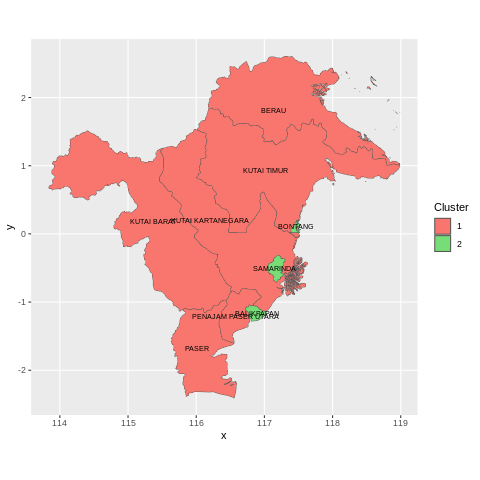

In [345]:
%%R
data2ckt <- read.csv("/content/Data 2 Cluster Kaltim_merged.csv")

rownames(data2ckt) = data2ckt[,2]
data2ckt$Cluster = as.character(data2ckt$Cluster)

data2ckt <- st_as_sf(data2ckt, wkt = "geometry")

p = ggplot(data2ckt, aes(label = rownames(data2ckt))) +
  geom_sf(data = data2ckt, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k=3

In [346]:
data3c_kaltim = pd.read_csv("/content/Data 3 Cluster Kalimantan Timur")
data3c_kaltim.iloc[:,0] = data3c_kaltim.iloc[:,0].str.upper()
data3c_kaltim.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data3c_kaltim

KabupatenKota  Cluster
0                PASER        1
1          KUTAI BARAT        1
2    KUTAI KARTANEGARA        1
3          KUTAI TIMUR        1
4                BERAU        1
5  PENAJAM PASER UTARA        1
6           BALIKPAPAN        3
7            SAMARINDA        3
8              BONTANG        2

In [347]:
data3c_kaltim_merged= pd.merge(geokt, data3c_kaltim, how = 'left', on = geokt.columns[0])
data3c_kaltim_merged

KabupatenKota                                           geometry  \
0           BALIKPAPAN  MULTIPOLYGON (((116.8328 -1.2791, 116.8109 -1....   
1                BERAU  MULTIPOLYGON (((118.9883 1.7833, 118.9881 1.78...   
2              BONTANG  MULTIPOLYGON (((117.3892 0.0225, 117.3886 0.06...   
3          KUTAI BARAT  MULTIPOLYGON (((116.1815 -1.1179, 116.1656 -1....   
4    KUTAI KARTANEGARA  MULTIPOLYGON (((117.5074 -0.4011, 117.5079 -0....   
5          KUTAI TIMUR  MULTIPOLYGON (((116.7684 0.1266, 116.7499 0.10...   
6                PASER  MULTIPOLYGON (((115.8531 -2.3735, 115.85 -2.36...   
7  PENAJAM PASER UTARA  MULTIPOLYGON (((116.4885 -1.5796, 116.4452 -1....   
8            SAMARINDA  MULTIPOLYGON (((117.2645 -0.5374, 117.267 -0.5...   

   Cluster  
0        3  
1        1  
2        2  
3        1  
4        1  
5        1  
6        1  
7        1  
8        3

In [348]:
data3c_kaltim_merged.to_csv("/content/Data 3 Cluster Kaltim_merged.csv")

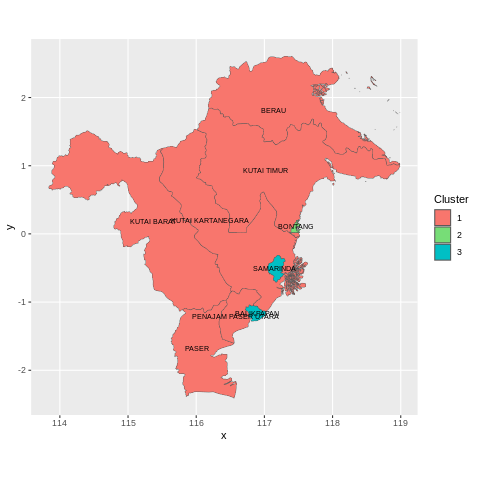

In [350]:
%%R
data3ckt <- read.csv("/content/Data 3 Cluster Kaltim_merged.csv")

rownames(data3ckt) = data3ckt[,2]
data3ckt$Cluster = as.character(data3ckt$Cluster)

data3ckt <- st_as_sf(data3ckt, wkt = "geometry")

p = ggplot(data3ckt, aes(label = rownames(data3ckt))) +
  geom_sf(data = data3ckt, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4"))

p+geom_sf_text(size = 2.5)

3. Kalimantan Utara

In [351]:
#Pre-Processing Data
geoku=data1.iloc[50:55,:]
geoku



KabupatenKota                                           geometry
50      BULUNGAN  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...
51       MALINAU  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...
52       NUNUKAN  MULTIPOLYGON (((115.7691 3.463, 115.7624 3.447...
53   TANA TIDUNG  MULTIPOLYGON (((117.4151 3.3739, 117.4164 3.38...
54       TARAKAN  MULTIPOLYGON (((117.6661 3.3839, 117.6649 3.38...

- Cluster dengan k=2

In [357]:
data2c_kaltara = pd.read_csv("/content/Data 2 Cluster Kalimantan Utara")
data2c_kaltara

Unnamed: 0  Cluster
0      Malinau        1
1     Bulungan        1
2  Tana Tidung        1
3      Nunukan        1
4      Tarakan        2

In [358]:
data2c_kaltara.iloc[:,0] = data2c_kaltara.iloc[:,0].str.upper()
data2c_kaltara.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data2c_kaltara

KabupatenKota  Cluster
0       MALINAU        1
1      BULUNGAN        1
2   TANA TIDUNG        1
3       NUNUKAN        1
4       TARAKAN        2

In [359]:
data2c_kaltara_merged= pd.merge(geoku, data2c_kaltara, how = 'left', on = geoku.columns[0])
data2c_kaltara_merged

KabupatenKota                                           geometry  Cluster
0      BULUNGAN  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...        1
1       MALINAU  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...        1
2       NUNUKAN  MULTIPOLYGON (((115.7691 3.463, 115.7624 3.447...        1
3   TANA TIDUNG  MULTIPOLYGON (((117.4151 3.3739, 117.4164 3.38...        1
4       TARAKAN  MULTIPOLYGON (((117.6661 3.3839, 117.6649 3.38...        2

In [360]:
data2c_kaltara_merged.to_csv("/content/Data 2 Cluster Kaltara_merged.csv")

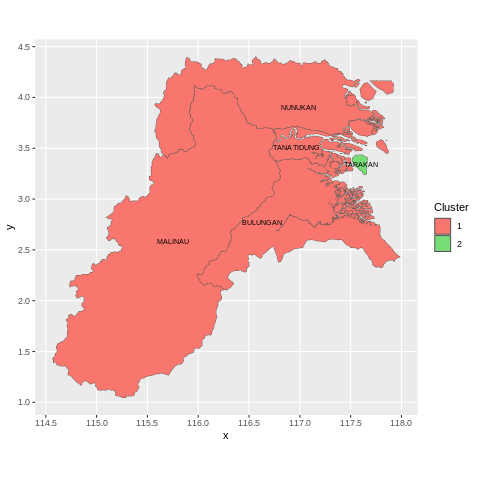

In [362]:
%%R
data2cku <- read.csv("/content/Data 2 Cluster Kaltara_merged.csv")

rownames(data2cku) = data2cku[,2]
data2cku$Cluster = as.character(data2cku$Cluster)

data2cku <- st_as_sf(data2cku, wkt = "geometry")

p = ggplot(data2cku, aes(label = rownames(data2cku))) +
  geom_sf(data = data2cku, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k=3

In [363]:
data3c_kaltara = pd.read_csv("/content/Data 3 Cluster Kalimantan Utara")
data3c_kaltara.iloc[:,0] = data3c_kaltara.iloc[:,0].str.upper()
data3c_kaltara.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data3c_kaltara

KabupatenKota  Cluster
0       MALINAU        2
1      BULUNGAN        2
2   TANA TIDUNG        1
3       NUNUKAN        1
4       TARAKAN        3

In [364]:
data3c_kaltara_merged= pd.merge(geoku, data3c_kaltara, how = 'left', on = geoku.columns[0])
data3c_kaltara_merged

KabupatenKota                                           geometry  Cluster
0      BULUNGAN  MULTIPOLYGON (((117.1905 2.7709, 117.195 2.775...        2
1       MALINAU  MULTIPOLYGON (((115.4639 1.2394, 115.4364 1.22...        2
2       NUNUKAN  MULTIPOLYGON (((115.7691 3.463, 115.7624 3.447...        1
3   TANA TIDUNG  MULTIPOLYGON (((117.4151 3.3739, 117.4164 3.38...        1
4       TARAKAN  MULTIPOLYGON (((117.6661 3.3839, 117.6649 3.38...        3

In [365]:
data3c_kaltara_merged.to_csv("/content/Data 3 Cluster Kaltara_merged.csv")

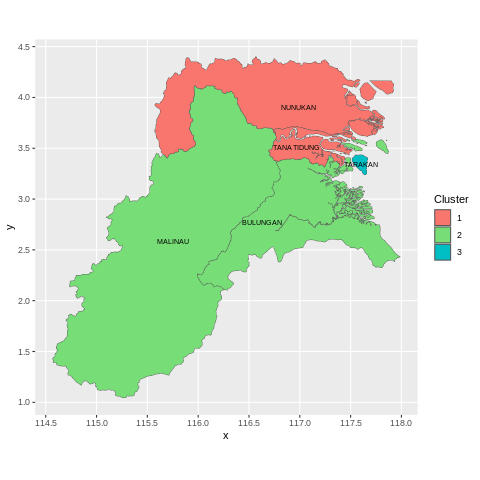

In [367]:
%%R
data3cku <- read.csv("/content/Data 3 Cluster Kaltara_merged.csv")

rownames(data3cku) = data3cku[,2]
data3cku$Cluster = as.character(data3cku$Cluster)

data3cku <- st_as_sf(data3cku, wkt = "geometry")

p = ggplot(data3cku, aes(label = rownames(data3cku))) +
  geom_sf(data = data3cku, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4"))

p+geom_sf_text(size = 2.5)

4. Kalimantan Selatan

In [368]:
#Pre-Processing Data
geoks=data1.iloc[14:27,:]
geoks



KabupatenKota                                           geometry
14             BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....
15               BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....
16         BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....
17  HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....
18   HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....
19    HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....
20     KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....
21     KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....
22             KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...
23             TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...
24          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...
25           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....
26                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....

- Cluster dengan k=2

In [369]:
data2c_kalsel = pd.read_csv("/content/Data 2 Cluster Kalimantan Selatan")
data2c_kalsel

Unnamed: 0  Cluster
0            TANAH LAUT        1
1              KOTABARU        1
2                BANJAR        1
3          BARITO KUALA        1
4                 TAPIN        1
5   HULU SUNGAI SELATAN        1
6    HULU SUNGAI TENGAH        1
7     HULU SUNGAI UTARA        1
8              TABALONG        1
9           TANAH BUMBU        1
10             BALANGAN        1
11     KOTA BANJARMASIN        2
12     KOTA BANJAR BARU        2

In [370]:
data2c_kalsel.iloc[:,0] = data2c_kalsel.iloc[:,0].str.upper()
data2c_kalsel.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data2c_kalsel

KabupatenKota  Cluster
0            TANAH LAUT        1
1              KOTABARU        1
2                BANJAR        1
3          BARITO KUALA        1
4                 TAPIN        1
5   HULU SUNGAI SELATAN        1
6    HULU SUNGAI TENGAH        1
7     HULU SUNGAI UTARA        1
8              TABALONG        1
9           TANAH BUMBU        1
10             BALANGAN        1
11     KOTA BANJARMASIN        2
12     KOTA BANJAR BARU        2

In [371]:
data2c_kalsel_merged= pd.merge(geoks, data2c_kalsel, how = 'left', on = geoks.columns[0])
data2c_kalsel_merged

KabupatenKota                                           geometry  \
0              BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....   
1                BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....   
2          BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....   
3   HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....   
4    HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....   
5     HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....   
6      KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....   
7      KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....   
8              KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...   
9              TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...   
10          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...   
11           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....   
12                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....   

    Cluster  
0         1  
1         1  
2         1  
3         1  
4         1  
5         1  
6         2  
7         2  
8         1  
9         1  
10        1  
11        1  
12        1

In [372]:
data2c_kalsel_merged.to_csv("/content/Data 2 Cluster Kalsel_merged.csv")

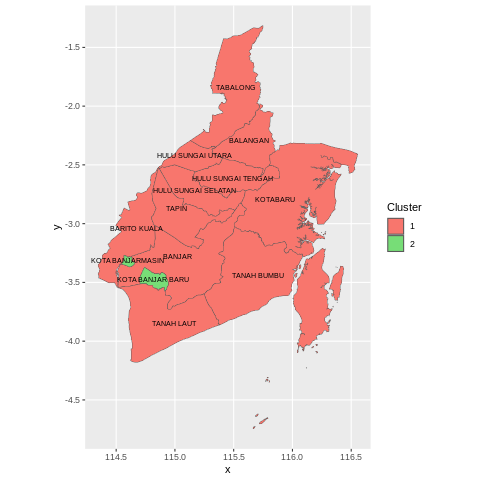

In [373]:
%%R
data2cks <- read.csv("/content/Data 2 Cluster Kalsel_merged.csv")

rownames(data2cks) = data2cks[,2]
data2cks$Cluster = as.character(data2cks$Cluster)

data2cks <- st_as_sf(data2cks, wkt = "geometry")

p = ggplot(data2cks, aes(label = rownames(data2cks))) +
  geom_sf(data = data2cks, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k=3

In [374]:
data3c_kalsel = pd.read_csv("/content/Data 3 Cluster Kalimantan Selatan")
data3c_kalsel.iloc[:,0] = data3c_kalsel.iloc[:,0].str.upper()
data3c_kalsel.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data3c_kalsel

KabupatenKota  Cluster
0            TANAH LAUT        2
1              KOTABARU        2
2                BANJAR        2
3          BARITO KUALA        1
4                 TAPIN        2
5   HULU SUNGAI SELATAN        2
6    HULU SUNGAI TENGAH        2
7     HULU SUNGAI UTARA        1
8              TABALONG        2
9           TANAH BUMBU        2
10             BALANGAN        2
11     KOTA BANJARMASIN        3
12     KOTA BANJAR BARU        3

In [375]:
data3c_kalsel_merged= pd.merge(geoks, data3c_kalsel, how = 'left', on = geoks.columns[0])
data3c_kalsel_merged

KabupatenKota                                           geometry  \
0              BALANGAN  MULTIPOLYGON (((115.8083 -2.4485, 115.8087 -2....   
1                BANJAR  MULTIPOLYGON (((114.5969 -3.5329, 114.5822 -3....   
2          BARITO KUALA  MULTIPOLYGON (((114.4979 -3.4236, 114.5126 -3....   
3   HULU SUNGAI SELATAN  MULTIPOLYGON (((115.2809 -2.9177, 115.2698 -2....   
4    HULU SUNGAI TENGAH  MULTIPOLYGON (((115.3289 -2.7021, 115.3209 -2....   
5     HULU SUNGAI UTARA  MULTIPOLYGON (((115.1482 -2.5481, 115.1417 -2....   
6      KOTA BANJAR BARU  MULTIPOLYGON (((114.8663 -3.5577, 114.8674 -3....   
7      KOTA BANJARMASIN  MULTIPOLYGON (((114.6283 -3.3122, 114.6369 -3....   
8              KOTABARU  MULTIPOLYGON (((116.1521 -2.99, 116.1679 -2.99...   
9              TABALONG  MULTIPOLYGON (((115.258 -2.3552, 115.2502 -2.3...   
10          TANAH BUMBU  MULTIPOLYGON (((115.7871 -3.6801, 115.769 -3.6...   
11           TANAH LAUT  MULTIPOLYGON (((114.8036 -4.1195, 114.7281 -4....   
12                TAPIN  MULTIPOLYGON (((115.1619 -3.1896, 115.1437 -3....   

    Cluster  
0         2  
1         2  
2         1  
3         2  
4         2  
5         1  
6         3  
7         3  
8         2  
9         2  
10        2  
11        2  
12        2

In [376]:
data3c_kalsel_merged.to_csv("/content/Data 3 Cluster Kalsel_merged.csv")

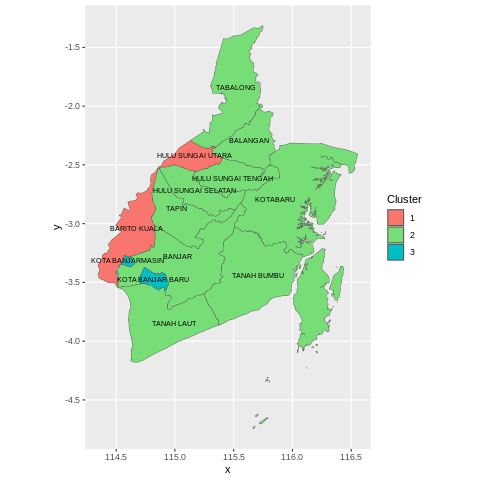

In [377]:
%%R
data3cks <- read.csv("/content/Data 3 Cluster Kalsel_merged.csv")

rownames(data3cks) = data3cks[,2]
data3cks$Cluster = as.character(data3cks$Cluster)

data3cks <- st_as_sf(data3cks, wkt = "geometry")

p = ggplot(data3cks, aes(label = rownames(data3cks))) +
  geom_sf(data = data3cks, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4"))

p+geom_sf_text(size = 2.5)

5. Kalimantan Tengah

In [378]:
#Pre-Processing Data
geokc=data1.iloc[27:41,:]
geokc



KabupatenKota                                           geometry
27      BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....
28        BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....
29        BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....
30          GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....
31              KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....
32            KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....
33  KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....
34  KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....
35            LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....
36         MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....
37       PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....
38        PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....
39             SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...
40            SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...

- Cluster dengan k=2

In [379]:
data2c_kalteng = pd.read_csv("/content/Data 2 Cluster Kalimantan Tengah")
data2c_kalteng

Unnamed: 0  Cluster
0   Kotawaringin Barat        1
1   Kotawaringin Timur        1
2               Kapuas        1
3       Barito Selatan        1
4         Barito Utara        1
5             Sukamara        1
6             Lamandau        1
7              Seruyan        1
8             Katingan        1
9         Pulang Pisau        1
10          Gunung Mas        1
11        Barito Timur        1
12         Murung Raya        1
13       Palangka Raya        2

In [380]:
data2c_kalteng.iloc[:,0] = data2c_kalteng.iloc[:,0].str.upper()
data2c_kalteng.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data2c_kalteng

KabupatenKota  Cluster
0   KOTAWARINGIN BARAT        1
1   KOTAWARINGIN TIMUR        1
2               KAPUAS        1
3       BARITO SELATAN        1
4         BARITO UTARA        1
5             SUKAMARA        1
6             LAMANDAU        1
7              SERUYAN        1
8             KATINGAN        1
9         PULANG PISAU        1
10          GUNUNG MAS        1
11        BARITO TIMUR        1
12         MURUNG RAYA        1
13       PALANGKA RAYA        2

In [381]:
data2c_kalteng_merged= pd.merge(geokc, data2c_kalteng, how = 'left', on = geokc.columns[0])
data2c_kalteng_merged

KabupatenKota                                           geometry  \
0       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....   
1         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....   
2         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....   
3           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....   
4               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....   
5             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....   
6   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....   
7   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....   
8             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....   
9          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....   
10       PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....   
11        PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....   
12             SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...   
13            SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...   

    Cluster  
0         1  
1         1  
2         1  
3         1  
4         1  
5         1  
6         1  
7         1  
8         1  
9         1  
10        2  
11        1  
12        1  
13        1

In [382]:
data2c_kalteng_merged.to_csv("/content/Data 2 Cluster Kalteng_merged.csv")

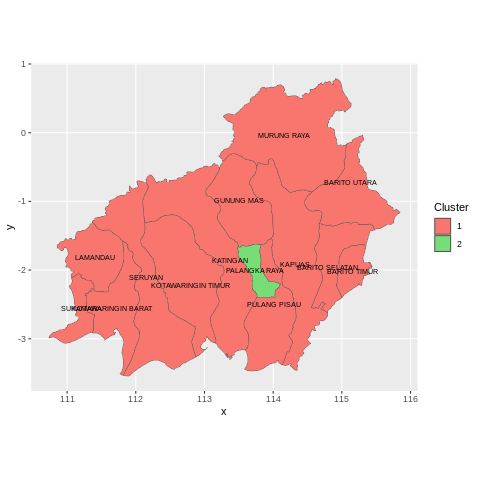

In [383]:
%%R
data2ckc <- read.csv("/content/Data 2 Cluster Kalteng_merged.csv")

rownames(data2ckc) = data2ckc[,2]
data2ckc$Cluster = as.character(data2ckc$Cluster)

data2ckc <- st_as_sf(data2ckc, wkt = "geometry")

p = ggplot(data2ckc, aes(label = rownames(data2ckc))) +
  geom_sf(data = data2ckc, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77"))

p+geom_sf_text(size = 2.5)

- Clustering dengan k=3

In [384]:
data3c_kalteng = pd.read_csv("/content/Data 3 Cluster Kalimantan Tengah")
data3c_kalteng.iloc[:,0] = data3c_kalteng.iloc[:,0].str.upper()
data3c_kalteng.rename(columns={"Unnamed: 0" : "KabupatenKota"}, inplace = True)
data3c_kalteng

KabupatenKota  Cluster
0   KOTAWARINGIN BARAT        1
1   KOTAWARINGIN TIMUR        1
2               KAPUAS        1
3       BARITO SELATAN        1
4         BARITO UTARA        2
5             SUKAMARA        2
6             LAMANDAU        1
7              SERUYAN        2
8             KATINGAN        1
9         PULANG PISAU        1
10          GUNUNG MAS        2
11        BARITO TIMUR        1
12         MURUNG RAYA        2
13       PALANGKA RAYA        3

In [385]:
data3c_kalteng_merged= pd.merge(geokc, data3c_kalteng, how = 'left', on = geokc.columns[0])
data3c_kalteng_merged

KabupatenKota                                           geometry  \
0       BARITO SELATAN  MULTIPOLYGON (((114.7341 -2.5837, 114.7137 -2....   
1         BARITO TIMUR  MULTIPOLYGON (((115.0593 -2.3399, 115.0443 -2....   
2         BARITO UTARA  MULTIPOLYGON (((114.6678 -1.3169, 114.6851 -1....   
3           GUNUNG MAS  MULTIPOLYGON (((114.0076 -1.4684, 114.0083 -1....   
4               KAPUAS  MULTIPOLYGON (((114.4487 -3.2109, 114.4366 -3....   
5             KATINGAN  MULTIPOLYGON (((113.6316 -3.1029, 113.6324 -3....   
6   KOTAWARINGIN BARAT  MULTIPOLYGON (((111.6319 -2.9603, 111.6249 -2....   
7   KOTAWARINGIN TIMUR  MULTIPOLYGON (((112.9446 -3.1272, 112.9524 -3....   
8             LAMANDAU  MULTIPOLYGON (((111.4631 -2.3111, 111.4383 -2....   
9          MURUNG RAYA  MULTIPOLYGON (((114.4662 -0.8359, 114.4591 -0....   
10       PALANGKA RAYA  MULTIPOLYGON (((113.9791 -2.1677, 114.0027 -2....   
11        PULANG PISAU  MULTIPOLYGON (((114.1156 -3.3728, 114.0822 -3....   
12             SERUYAN  MULTIPOLYGON (((112.6543 -3.389, 112.6363 -3.4...   
13            SUKAMARA  MULTIPOLYGON (((110.965 -3.0655, 110.951 -3.06...   

    Cluster  
0         1  
1         1  
2         2  
3         2  
4         1  
5         1  
6         1  
7         1  
8         1  
9         2  
10        3  
11        1  
12        2  
13        2

In [386]:
data3c_kalteng_merged.to_csv("/content/Data 3 Cluster Kalteng_merged.csv")

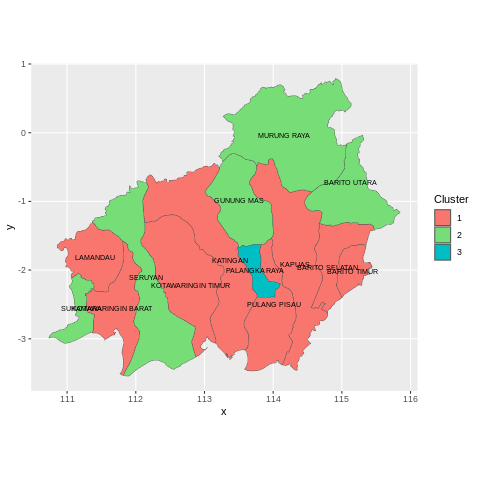

In [387]:
%%R
data3ckc <- read.csv("/content/Data 3 Cluster Kalteng_merged.csv")

rownames(data3ckc) = data3ckc[,2]
data3ckc$Cluster = as.character(data3ckc$Cluster)

data3ckc <- st_as_sf(data3ckc, wkt = "geometry")

p = ggplot(data3ckc, aes(label = rownames(data3ckc))) +
  geom_sf(data = data3ckc, aes(fill = Cluster)) +
  scale_fill_manual(values = c("#F8766D", "#77DD77", "#00BFC4"))

p+geom_sf_text(size = 2.5)